<a href="https://colab.research.google.com/github/VilasSonawane/Bank-Marketing-Effectiveness-Prediction-Model/blob/main/Vilas_Copy_of_Capstone_Project_on_Bank_Marketing_Effectiveness_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

# **Introduction**

## **Portugal has a modern banking system that includes one of the most advanced inter-bank networks in the world through Multibanco. There are currently over 150 banks in Portugal. This includes a range of private national retail banks, public and cooperative banks, international banks, and newer mobile banks in Portugal. Although the number of physical bank branches in Portugal is on the decline over the last decade, there are still around 36 branches per 100,000 of the population. That’s nearly three times the global average.The majority of banks in Portugal belong to the Portuguese Banking Association. The central bank in Portugal is the Banco de Portugal, which also serves as the regulatory authority for Portuguese banks**



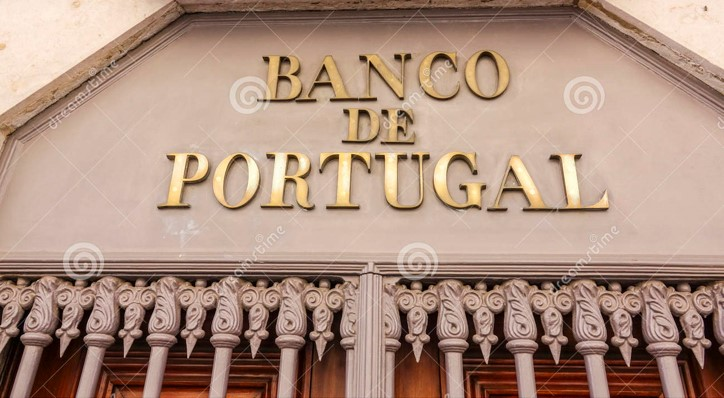

# **Problem Description**

## **The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).**


# **Main Objective:**
##**1. The main purpose of Our project is to build Machine Learning classification model which can predict the Effectiveness of Marketing Campaign to subscribe a term deposit of one of the  Portuguese banking institution.** 

##**2. This project will enable the bank to develop a more granular understanding of its customer base, predict customers' response to its telemarketing campaign and establish a target customer profile for future marketing plans.**

##**3. By analyzing customer features, such as demographics and transaction history, the bank will be able to predict customer saving behaviours and identify which type of customers is more likely to make term deposits. The bank can then focus its marketing efforts on those customers. This will not only allow the bank to secure deposits more effectively but also increase customer satisfaction by reducing undesirable advertisements for certain customers.**

In [866]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# **Import Dataset**

In [867]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [868]:
# Importing the dataset
bank_df = pd.read_csv('/content/drive/MyDrive/Bank Marketing Effectiveness Prediction/Data & Resources/bank-full.csv' ,sep =';')
bank_df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

# **Data Inspection**

In [869]:
bank_df.shape

(45211, 17)

In [870]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [871]:
bank_df.describe(include = "all")

age          job  marital  education default        balance  \
count   45211.000000        45211    45211      45211   45211   45211.000000   
unique           NaN           12        3          4       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN         9732    27214      23202   44396            NaN   
mean       40.936210          NaN      NaN        NaN     NaN    1362.272058   
std        10.618762          NaN      NaN        NaN     NaN    3044.765829   
min        18.000000          NaN      NaN        NaN     NaN   -8019.000000   
25%        33.000000          NaN      NaN        NaN     NaN      72.000000   
50%        39.000000          NaN      NaN        NaN     NaN     448.000000   
75%        48.000000          NaN      NaN        NaN     NaN    1428.000000   
max        95.000000          NaN      NaN        NaN     NaN  102127.000000   

       housing   loan   contact           day  month      duration  \
count    45211  45211     45211  45211.000000  45211  45211.000000   
unique       2      2         3           NaN     12           NaN   
top        yes     no  cellular           NaN    may           NaN   
freq     25130  37967     29285           NaN  13766           NaN   
mean       NaN    NaN       NaN     15.806419    NaN    258.163080   
std        NaN    NaN       NaN      8.322476    NaN    257.527812   
min        NaN    NaN       NaN      1.000000    NaN      0.000000   
25%        NaN    NaN       NaN      8.000000    NaN    103.000000   
50%        NaN    NaN       NaN     16.000000    NaN    180.000000   
75%        NaN    NaN       NaN     21.000000    NaN    319.000000   
max        NaN    NaN       NaN     31.000000    NaN   4918.000000   

            campaign         pdays      previous poutcome      y  
count   45211.000000  45211.000000  45211.000000    45211  45211  
unique           NaN           NaN           NaN        4      2  
top              NaN           NaN           NaN  unknown     no  
freq             NaN           NaN           NaN    36959  39922  
mean        2.763841     40.197828      0.580323      NaN    NaN  
std         3.098021    100.128746      2.303441      NaN    NaN  
min         1.000000     -1.000000      0.000000      NaN    NaN  
25%         1.000000     -1.000000      0.000000      NaN    NaN  
50%         2.000000     -1.000000      0.000000      NaN    NaN  
75%         3.000000     -1.000000      0.000000      NaN    NaN  
max        63.000000    871.000000    275.000000      NaN    NaN

# **Data Summary**

**1. There are 45,211 observations in this dataset. Each represents an existing customer that the bank reached via phone calls.**

**2. For each observation, the dataset records 16 input variables that stand for both qualitative and quantitative attributes of the customer, such as age, job, housing and personal loan status, account balance, and the number of contacts.**

**3. There is a single binary output variable that denotes “yes” or “no” revealing the outcomes of the phone calls.**

# **Exploratary Data Analysis**

In [872]:
bank_df.isnull().sum().sort_values(ascending = False)

age          0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
job          0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
y            0
dtype: int64

In [873]:
# find Categarical variables
categorical = [var for var in bank_df.columns if bank_df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
categorical

There are 10 categorical variables


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [874]:
# find Numerical variables
numerical = [var for var in bank_df.columns if bank_df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))
numerical

There are 7 numerical variables


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [875]:
# Value Counts of Categarical Features
for var in categorical:
  print('--'*50)
  print(f'Value Counts of Feature {var}')
  print(bank_df[var].value_counts())

----------------------------------------------------------------------------------------------------
Value Counts of Feature job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
----------------------------------------------------------------------------------------------------
Value Counts of Feature marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
----------------------------------------------------------------------------------------------------
Value Counts of Feature education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
----------------------------------------------------------------------------------------------------
Value Counts of Feature de

# **Univariate Analysis**

### **To obtain a better understanding of the dataset, the distribution of key variables and the relationships among them were plotted.**

In [876]:
bank_df['Outcome_y'] = (bank_df['y']=='yes').astype(int)

### **Since the label of the data-set are given in terms of ‘yes’ and ‘no’, it’s necessary to replace them with numbers, possibly with 1 and 0 respectively, so that they can be used in modelling of the data. In the first step we will convert the output labels of the data-set from binary strings of yes/no to integers 1/0.**

# **Categorical Features**

# **1. Job**

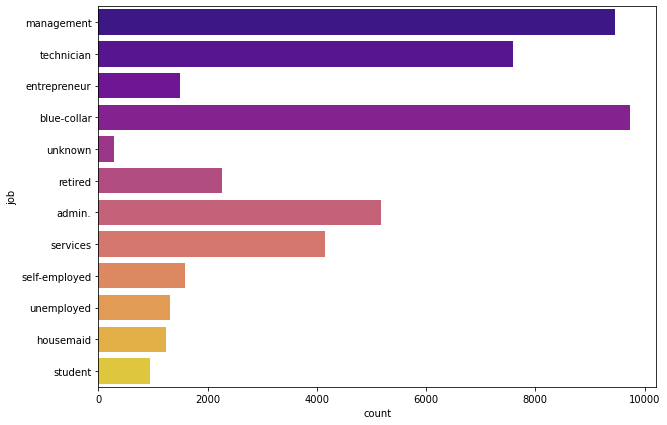

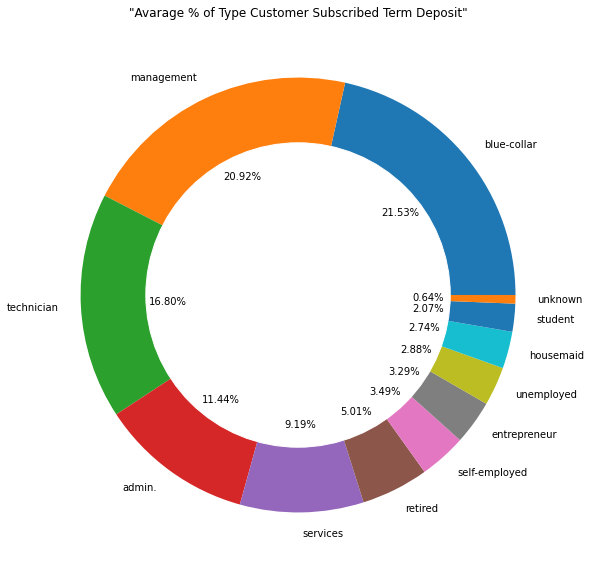

In [912]:
plt.figure(figsize=(10, 7))
sns.countplot(data=bank_df, y="job", palette="plasma")
#Lets see pie plot of job categorical feature 
plt.figure(figsize=(10,10))
plt.pie(bank_df.job.value_counts() ,labels=bank_df.job.value_counts().index,autopct='%1.2f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('"Avarage % of Type Customer Subscribed Term Deposit"')
plt.show()

#**2.Marital**

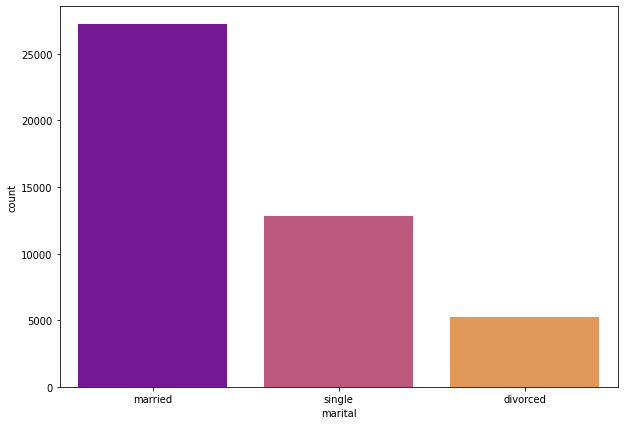

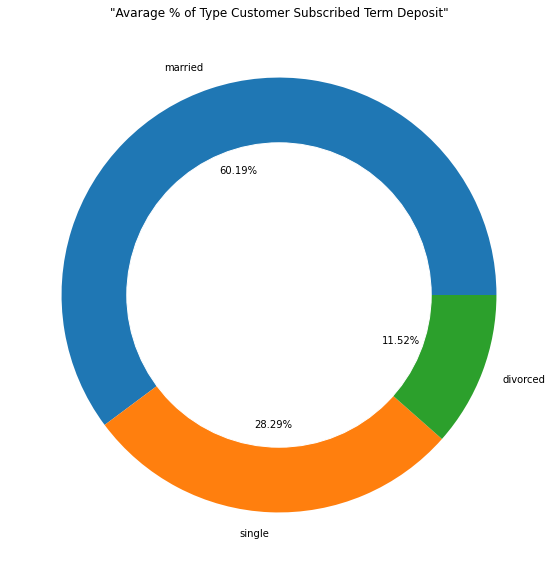

In [911]:
plt.figure(figsize=(10, 7))
sns.countplot(data=bank_df, x="marital", palette="plasma")
#Lets see pie plot of job categorical feature 
plt.figure(figsize=(10,10))
plt.pie(bank_df.marital.value_counts() ,labels=bank_df.marital.value_counts().index,autopct='%1.2f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('"Avarage % of Type Customer Subscribed Term Deposit"')
plt.show()

#**3.Education**

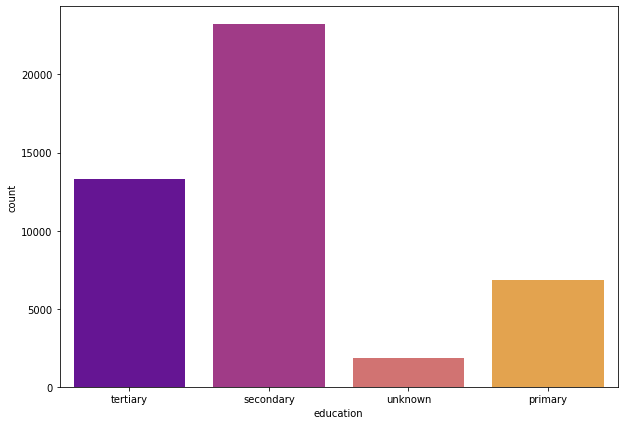

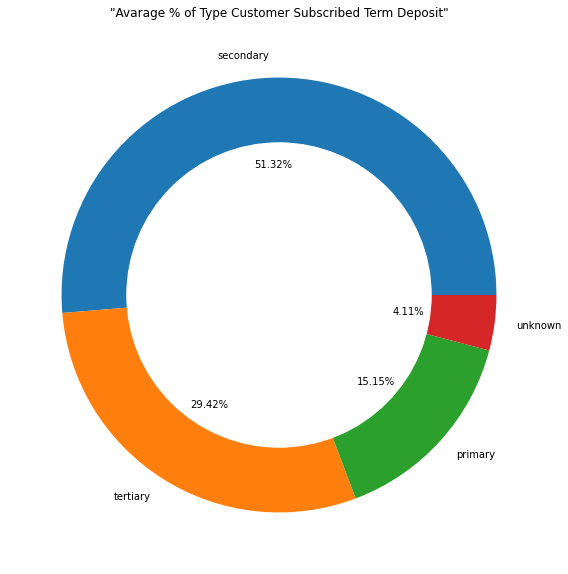

In [918]:
plt.figure(figsize=(10, 7))
sns.countplot(data=bank_df, x="education", palette="plasma")
#Lets see pie plot of job categorical feature 
plt.figure(figsize=(10,10))
plt.pie(bank_df.education.value_counts() ,labels=bank_df.education.value_counts().index,autopct='%1.2f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('"Avarage % of Type Customer Subscribed Term Deposit"')
plt.show()

#**4.Default**

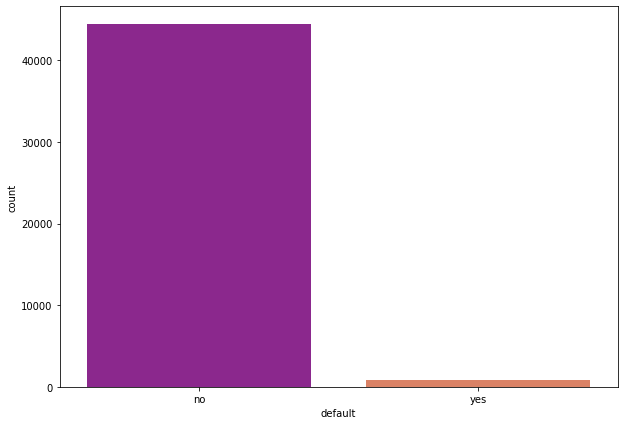

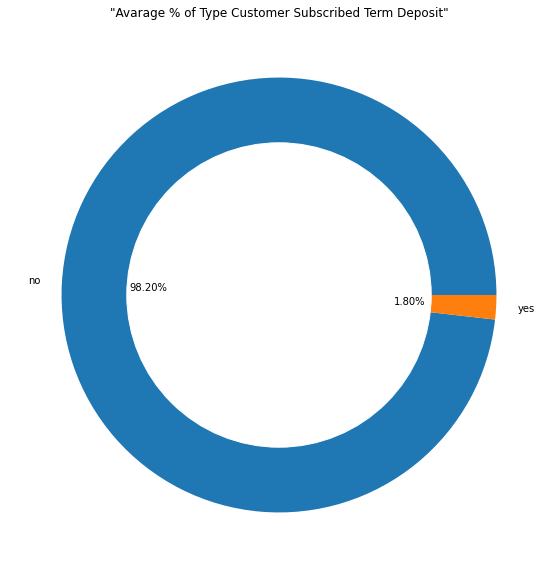

In [917]:
plt.figure(figsize=(10, 7))
sns.countplot(data=bank_df, x="default", palette="plasma")
#Lets see pie plot of job categorical feature 
plt.figure(figsize=(10,10))
plt.pie(bank_df.default.value_counts() ,labels=bank_df.default.value_counts().index,autopct='%1.2f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('"Avarage % of Type Customer Subscribed Term Deposit"')
plt.show()

#**5.housing**

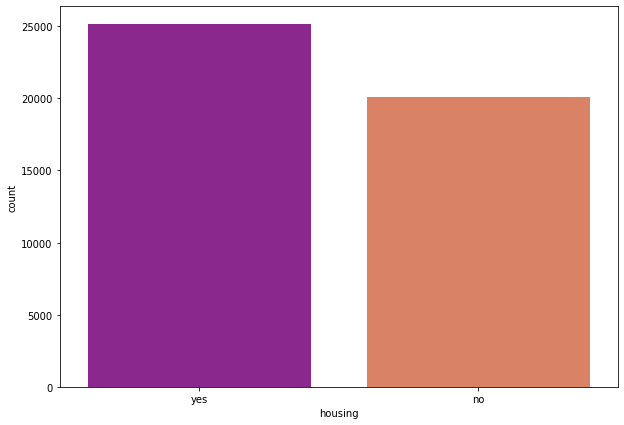

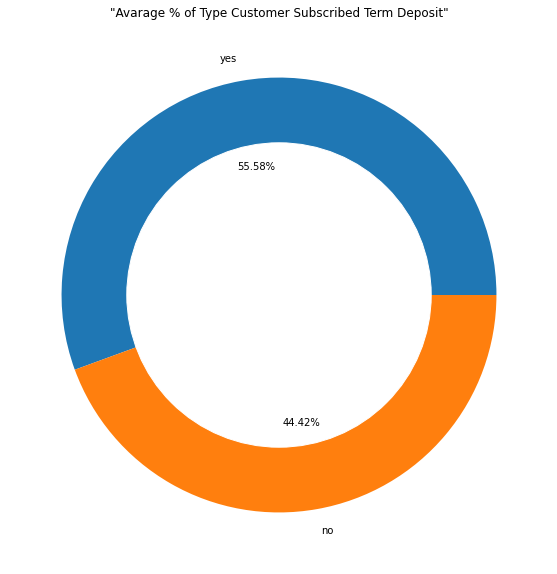

In [916]:
plt.figure(figsize=(10, 7))
sns.countplot(data=bank_df, x="housing", palette="plasma")
#Lets see pie plot of job categorical feature 
plt.figure(figsize=(10,10))
plt.pie(bank_df.housing.value_counts() ,labels=bank_df.housing.value_counts().index,autopct='%1.2f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('"Avarage % of Type Customer Subscribed Term Deposit"')
plt.show()

#**6.Loan**

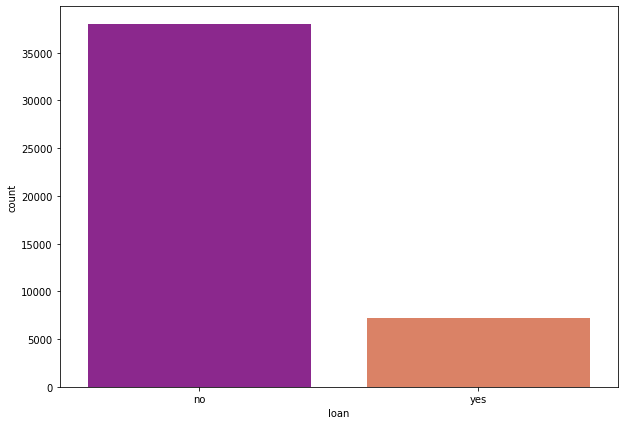

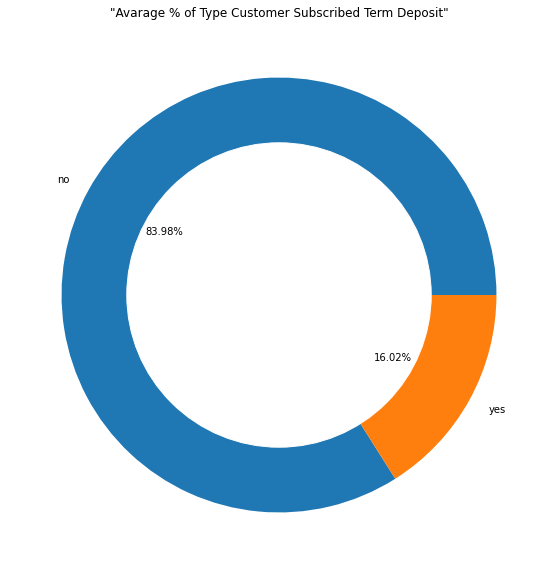

In [915]:
plt.figure(figsize=(10, 7))
sns.countplot(data=bank_df, x="loan", palette="plasma")
#Lets see pie plot of job categorical feature 
plt.figure(figsize=(10,10))
plt.pie(bank_df.loan.value_counts() ,labels=bank_df.loan.value_counts().index,autopct='%1.2f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('"Avarage % of Type Customer Subscribed Term Deposit"')
plt.show()

#**7.contact**

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(data=bank_df, x="contact", palette="plasma")
#Lets see pie plot of job categorical feature 
plt.figure(figsize=(10,10))
plt.pie(bank_df.contact.value_counts() ,labels=bank_df.contact.value_counts().index,autopct='%1.2f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('"Avarage % of Type Customer Subscribed Term Deposit"')
plt.show()

#**8.Month**

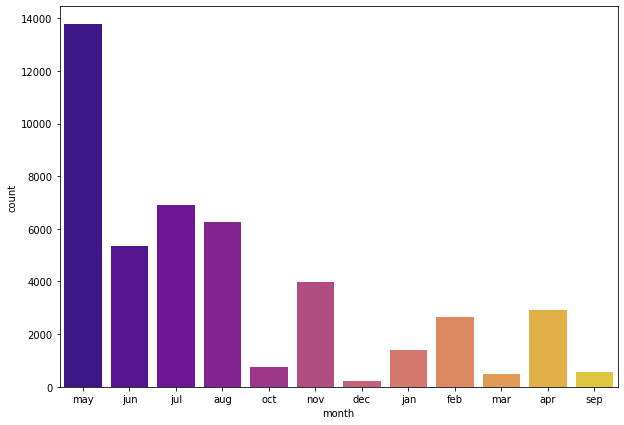

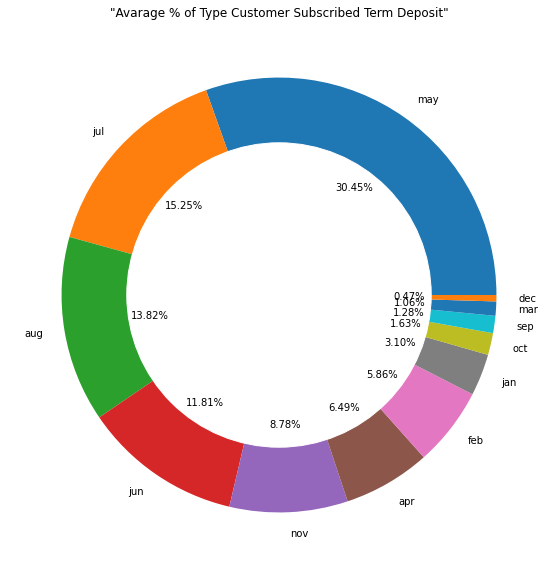

In [914]:
plt.figure(figsize=(10, 7))
sns.countplot(data=bank_df, x="month", palette="plasma")
#Lets see pie plot of job categorical feature 
plt.figure(figsize=(10,10))
plt.pie(bank_df.month.value_counts() ,labels=bank_df.month.value_counts().index,autopct='%1.2f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('"Avarage % of Type Customer Subscribed Term Deposit"')
plt.show()

#**9. poutcome**

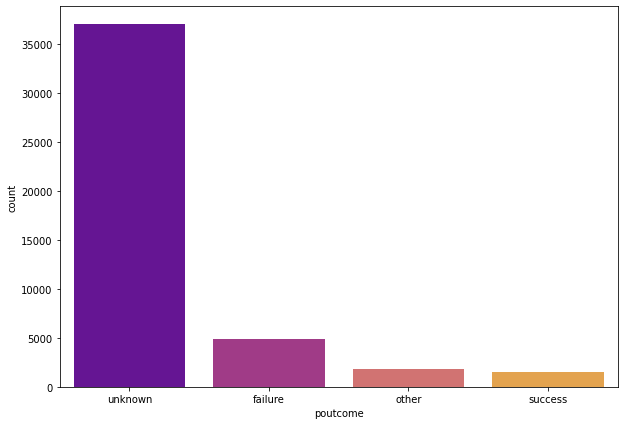

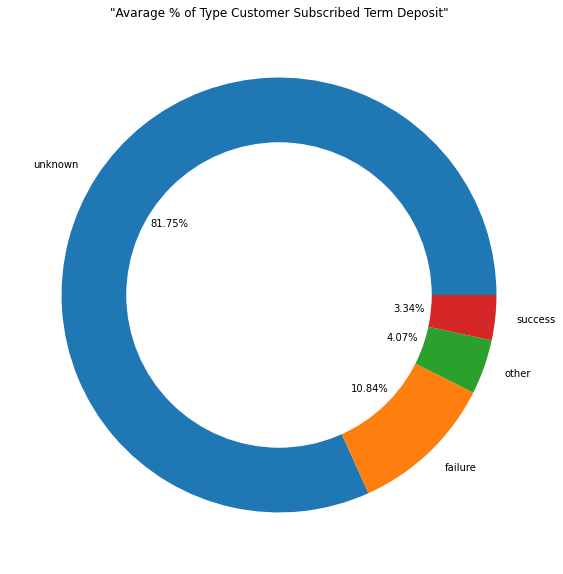

In [913]:
plt.figure(figsize=(10, 7))
sns.countplot(data=bank_df, x="poutcome", palette="plasma")
#Lets see pie plot of job categorical feature 
plt.figure(figsize=(10,10))
plt.pie(bank_df.poutcome.value_counts() ,labels=bank_df.poutcome.value_counts().index,autopct='%1.2f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('"Avarage % of Type Customer Subscribed Term Deposit"')
plt.show()

#**10. Y (Target Variable)**

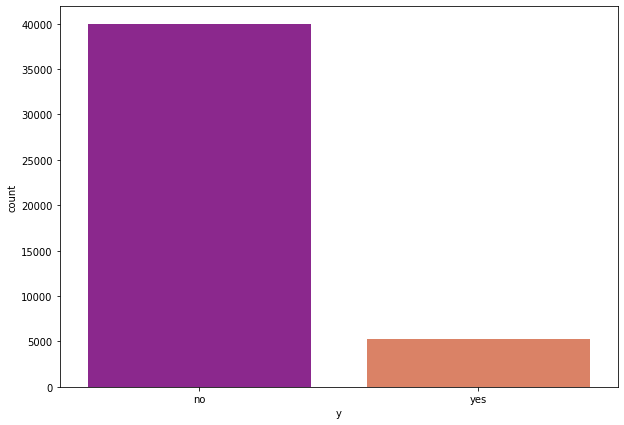

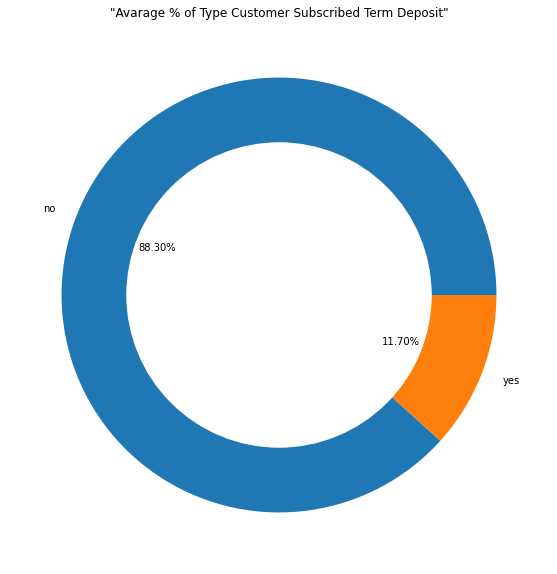

In [919]:
plt.figure(figsize=(10, 7))
sns.countplot(data=bank_df, x="y", palette="plasma")
#Lets see pie plot of job categorical feature 
plt.figure(figsize=(10,10))
plt.pie(bank_df.y.value_counts() ,labels=bank_df.y.value_counts().index,autopct='%1.2f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('"Avarage % of Type Customer Subscribed Term Deposit"')
plt.show()

# **Numarical Features**

# **1. Age**

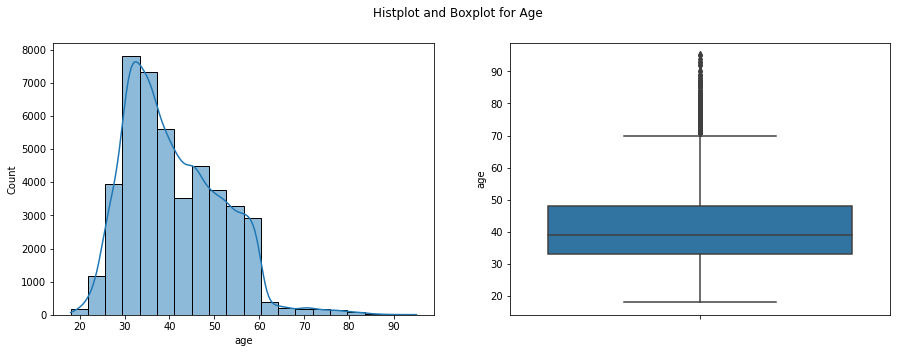

In [879]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for Age')
# HIstplot
sns.histplot(ax=axes[0], data=bank_df, x="age", bins=20,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=bank_df, y="age")



###**The distribution of age: In its telemarketing campaigns, clients called by the bank have an extensive age range, from 18 to 95 years old. However, a majority of customers called is in the age of 30s and 40s (33 to 48 years old fall within the 25th to 75th percentiles). The distribution of customer age is fairly normal with a small standard deviation.**

# **2. balance**

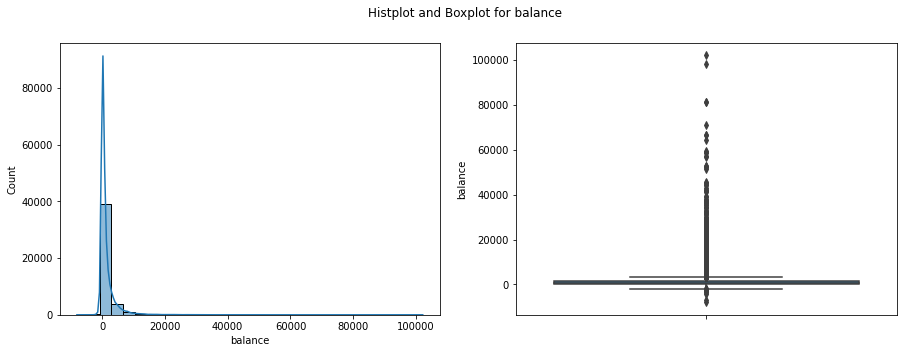

In [880]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for balance')
# HIstplot
sns.histplot(ax=axes[0], data=bank_df, x="balance", bins=30,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=bank_df, y="balance")

###**The distribution of balance:  The range of balance is  massive, approximately from a minimum of - 8000 to a maximum of 10000+ euros. The distribution of balance has a huge standard deviation relative to the mean, suggesting large variabilities in customers' balance levels.**

# **3. Day**

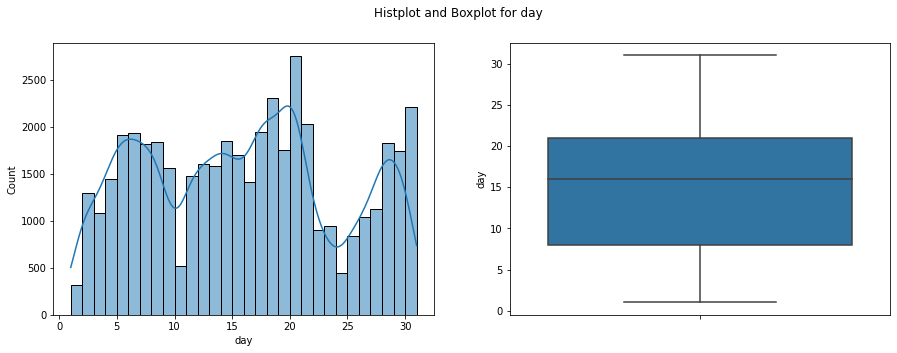

In [881]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for day')
# HIstplot
sns.histplot(ax=axes[0], data=bank_df, x="day", bins=30,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=bank_df, y="day")

# **4.Duration**

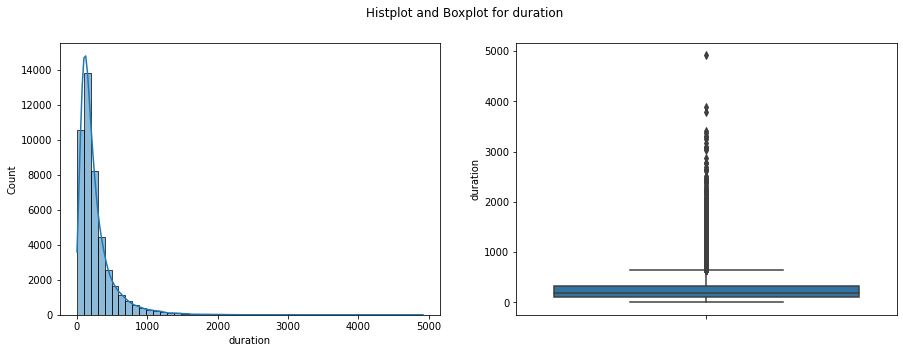

In [882]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for duration')
# HIstplot
sns.histplot(ax=axes[0], data=bank_df, x="duration", bins=50,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=bank_df, y="duration")

###**The distribution of duration: As observed from the box plot, the duration of contact has a median of around 200 sec , with an interquartile range of 100 second 350 second. The left-skewed boxplot indicates that most calls are relatively short. Also, there is a large number of outliers ranging from 1000 seconds to 5000 seconds, which are worth further study.**

# **5.Campaign**

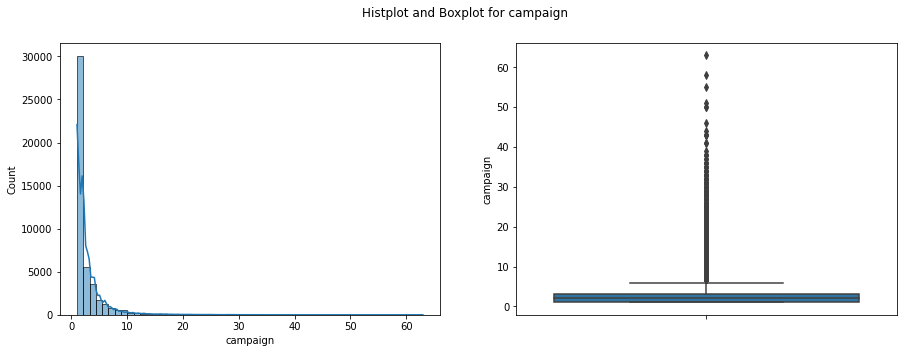

In [883]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for campaign')
# HIstplot
sns.histplot(ax=axes[0], data=bank_df, x="campaign", bins=55,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=bank_df, y="campaign")

###**The distribution of campagin: About half of the clients have been contacted by the bank for the second time, while 25% was first introduced to the term deposit. Most clients have been reached by the bank for one to three times, which is reasonable. However, some clients have been contacted by as high as 60+ times, which is not normal. These clients may have some special needs that require frequent contact.**

# **6.Pdays**

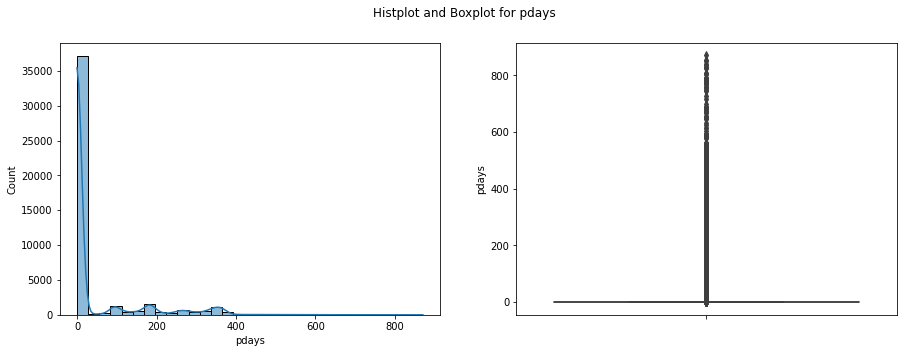

In [884]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for pdays')
# HIstplot
sns.histplot(ax=axes[0], data=bank_df, x="pdays", bins=31,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=bank_df, y="pdays")

# **7. previous**

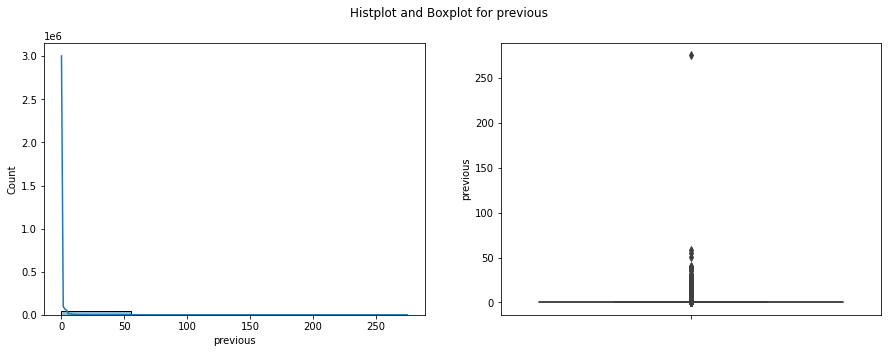

In [885]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for previous')
# HIstplot
sns.histplot(ax=axes[0], data=bank_df, x="previous", bins=5,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=bank_df, y="previous")

# **Multivariate Analyis**

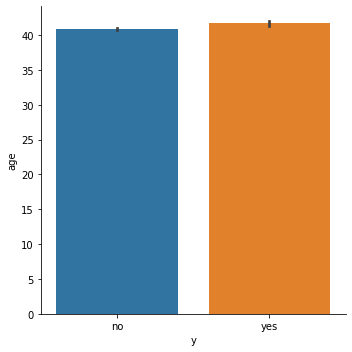

In [886]:
sns.catplot( y="age", x="y",kind="bar",data=bank_df)

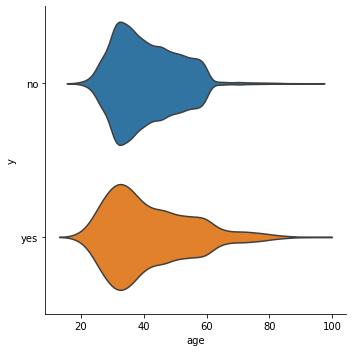

In [887]:
sns.catplot(x="age", y="y", kind="violin", inner=None, data=bank_df)


# **Analsing the Effect of Features on Conversion of Success i.e. (Subscription Of Term Deposit)**

# **1. Type of Job**

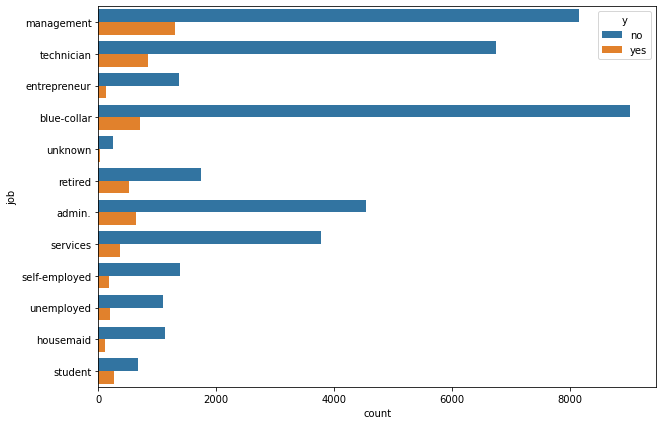

In [888]:
# Adding hue 
plt.figure(figsize=(10,7))
sns.countplot(y = bank_df['job'], hue=bank_df['y'])
plt.show()

In [894]:
x = bank_df.groupby('job').mean().reset_index()
x

job        age      balance        day    duration  campaign  \
0          admin.  39.289886  1135.838909  15.564301  246.896732  2.575324   
1     blue-collar  40.044081  1078.826654  15.442561  262.901562  2.816995   
2    entrepreneur  42.190989  1521.470074  15.702085  256.309348  2.799597   
3       housemaid  46.415323  1392.395161  16.002419  245.825000  2.820968   
4      management  40.449567  1763.616832  16.114189  253.995771  2.864348   
5         retired  61.626767  1984.215106  15.439488  287.361307  2.346731   
6   self-employed  40.484484  1647.970868  16.027866  268.157061  2.853072   
7        services  38.740250   997.088108  15.635532  259.318729  2.718344   
8         student  26.542644  1388.060768  14.897655  246.656716  2.299574   
9      technician  39.314598  1252.632092  16.408582  252.904962  2.906805   
10     unemployed  40.961627  1521.745971  15.498081  288.543361  2.432080   
11        unknown  47.593750  1772.357639  14.642361  237.611111  3.309028   

        pdays  previous  Outcome_y  
0   47.859021  0.671630   0.122027  
1   44.033498  0.505138   0.072750  
2   32.486214  0.478144   0.082717  
3   21.505645  0.371774   0.087903  
4   38.665468  0.668006   0.137556  
5   37.443905  0.638693   0.227915  
6   34.747308  0.551615   0.118429  
7   41.995185  0.501204   0.088830  
8   57.041578  0.953092   0.286780  
9   37.195077  0.574569   0.110570  
10  34.146585  0.466616   0.155027  
11  20.982639  0.319444   0.118056

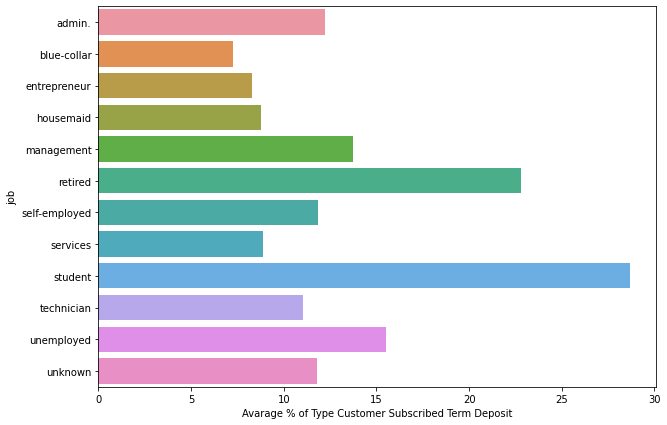

In [743]:
# % of Average Custmer who have subscribed our Product Jobwise
plt.figure(figsize=(10,7))
q=sns.barplot(x=(x.Outcome_y)*100, y = x.job)
q.set_xlabel("Avarage % of Type Customer Subscribed Term Deposit")
plt.show()

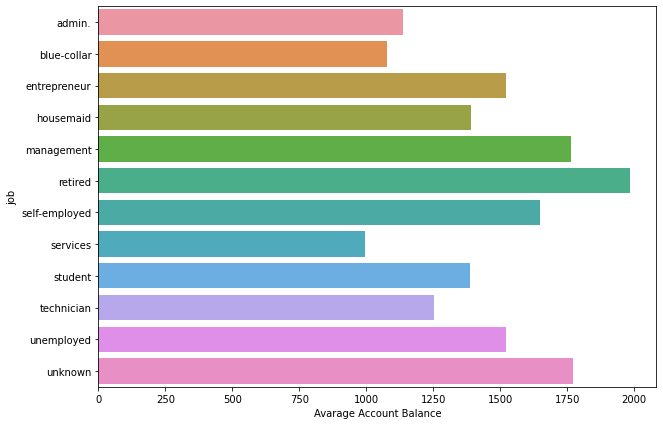

In [744]:
# Avarage  Account Balance of Custmer based on their Job.
plt.figure(figsize=(10,7))
p=sns.barplot(x=x.balance, y = x.job)
p.set_xlabel("Avarage Account Balance")
plt.show()

## **Insights: target students and retired clients**

###**As noted from the horizontal bar chart, students and retired clients account for more than 50% of subscription, which is consistent with the previous finding of higher subscription rates among the younger and older.**

# **2.Marital Status**

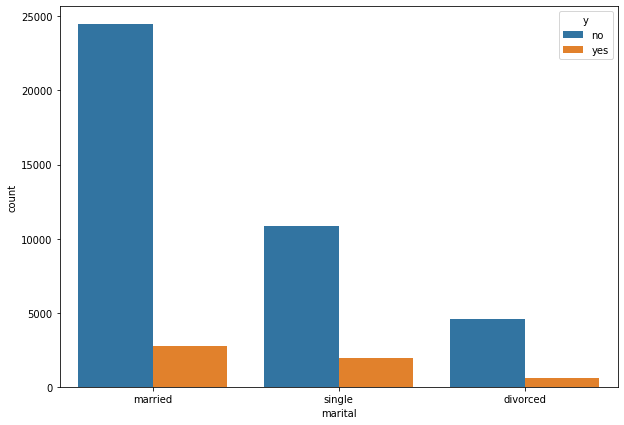

In [745]:
# Customer Subscribed Term Deposit Based on Marital Status
plt.figure(figsize=(10,7))
sns.countplot(bank_df['marital'], hue=bank_df['y'])
plt.show()

In [746]:
x = bank_df.groupby('marital').mean().reset_index()
x

marital        age      balance        day    duration  campaign  \
0  divorced  45.782984  1178.872287  15.796428  262.517188  2.630882   
1   married  43.408099  1425.925590  15.854487  253.412765  2.842875   
2    single  33.703440  1301.497654  15.708210  266.497967  2.649805   

       pdays  previous  Outcome_y  
0  41.001728  0.551373   0.119455  
1  37.950467  0.556552   0.101235  
2  44.652385  0.642690   0.149492

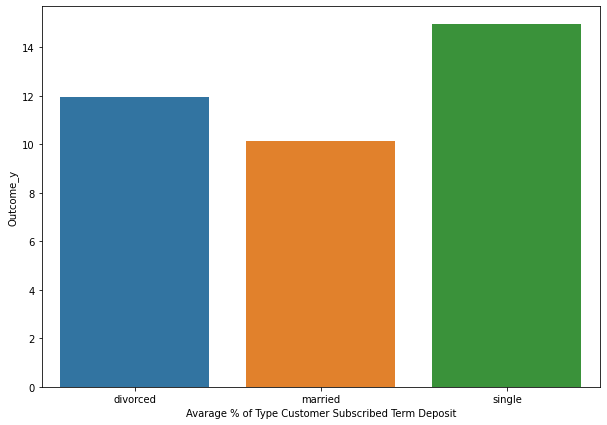

In [747]:
# % of Average Custmer who have subscribed our Product based on Marrital Status
plt.figure(figsize=(10,7))
q=sns.barplot(y=(x.Outcome_y)*100, x = x.marital)
q.set_xlabel("Avarage % of Type Customer Subscribed Term Deposit")
plt.show()

# **3. Type of Education**

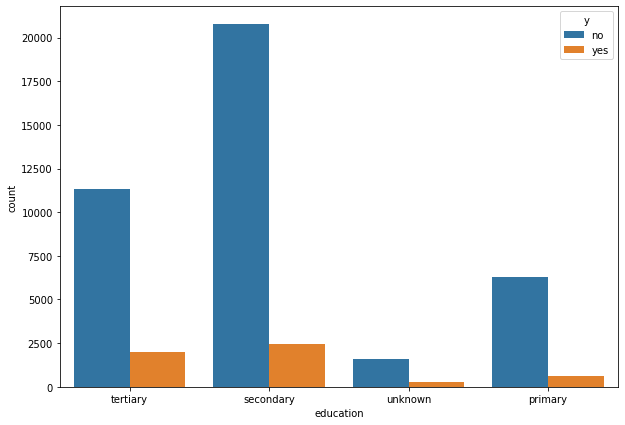

In [748]:
# # Customer Subscribed Term Deposit Based on Education Qualification
plt.figure(figsize=(10,7))
sns.countplot(bank_df['education'], hue=bank_df['y'])
plt.show()

In [749]:
x = bank_df.groupby('education').mean().reset_index()
x

education        age      balance        day    duration  campaign  \
0    primary  45.865567  1250.949934  15.421398  255.933002  2.834331   
1  secondary  39.964270  1154.880786  15.759159  258.685760  2.700802   
2   tertiary  39.593640  1758.416435  16.086535  258.518532  2.825577   
3    unknown  44.510501  1526.754443  15.810985  257.313947  2.849219   

       pdays  previous  Outcome_y  
0  36.081740  0.489272   0.086265  
1  42.353504  0.567753   0.105594  
2  39.024134  0.661980   0.150064  
3  36.856220  0.488422   0.135703

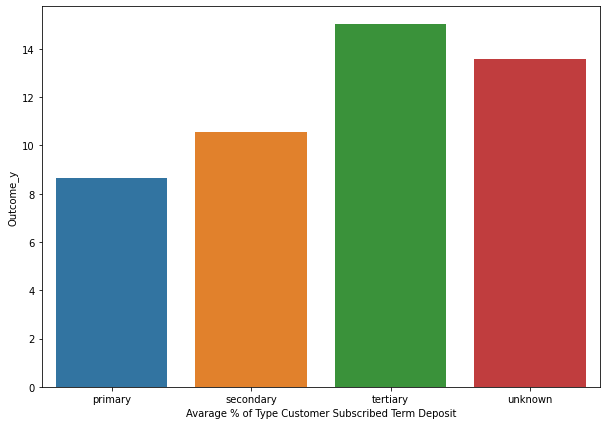

In [750]:
# % of Average Custmer who have subscribed our Product based on education Qualification
plt.figure(figsize=(10,7))
q=sns.barplot(y=(x.Outcome_y)*100, x = x.education)
q.set_xlabel("Avarage % of Type Customer Subscribed Term Deposit")
plt.show()

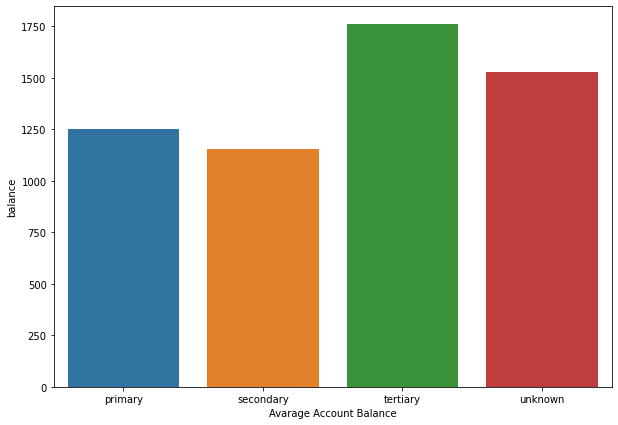

In [751]:
# Avarage  Account Balance of Custmer based on their Educational Qualification.
plt.figure(figsize=(10,7))
p=sns.barplot(y=x.balance, x = x.education)
p.set_xlabel("Avarage Account Balance")
plt.show()

# **4. Default In loan Payment**

In [752]:
x = bank_df.groupby('default').mean().reset_index()
x

default        age      balance        day    duration  campaign      pdays  \
0      no  40.961934  1389.806424  15.795792  258.512749  2.756780  40.604536   
1     yes  39.534969  -137.624540  16.385276  239.115337  3.148466  18.042945   

   previous  Outcome_y  
0  0.586044   0.117961  
1  0.268712   0.063804

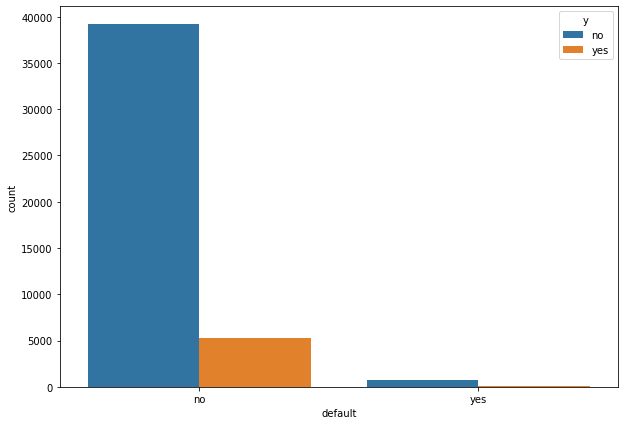

In [753]:
# # Customer Subscribed Term Deposit Based on Loan  default
plt.figure(figsize=(10,7))
sns.countplot(bank_df['default'], hue=bank_df['y'])
plt.show()

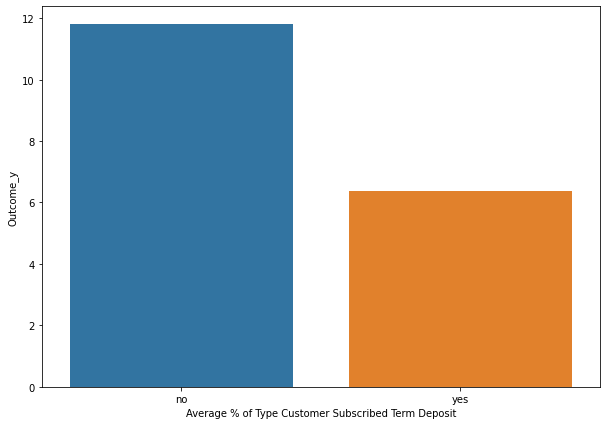

In [754]:
# % of Average Custmer who have subscribed our Product based on default
plt.figure(figsize=(10,7))
q=sns.barplot(y=(x.Outcome_y)*100, x = x.default)
q.set_xlabel("Average % of Type Customer Subscribed Term Deposit")
plt.show()

# **5. Those Who are having Housing Loan**

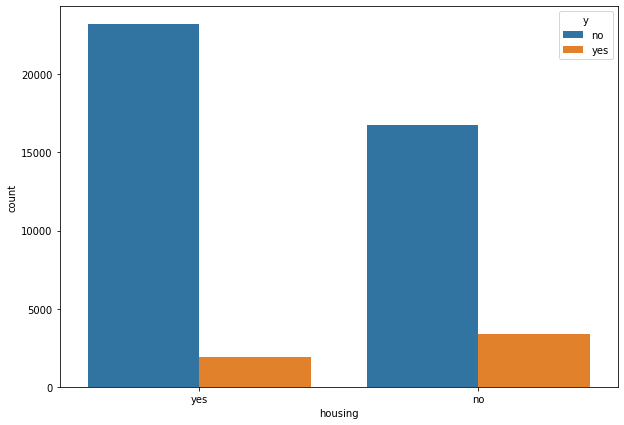

In [755]:
# # Customer Subscribed Term Deposit Based on Housing Loan
plt.figure(figsize=(10,7))
sns.countplot(bank_df['housing'], hue=bank_df['y'])
plt.show()

In [756]:
x = bank_df.groupby('housing').mean().reset_index()
x

housing        age      balance        day    duration  campaign      pdays  \
0      no  43.139883  1596.501270  16.066929  256.700911  2.845625  26.288581   
1     yes  39.175288  1175.103064  15.598249  259.331476  2.698488  51.312495   

   previous  Outcome_y  
0  0.484787   0.167024  
1  0.656665   0.077000

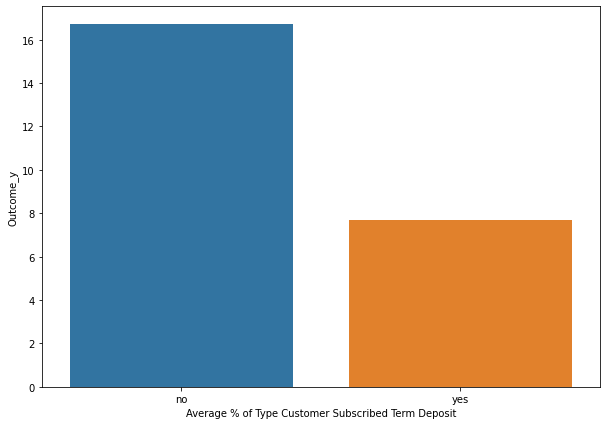

In [757]:
# % of Average Custmer who have subscribed our Product based on housing Loan
plt.figure(figsize=(10,7))
q=sns.barplot(y=(x.Outcome_y)*100, x = x.housing)
q.set_xlabel("Average % of Type Customer Subscribed Term Deposit")
plt.show()

# **6. Those who are having Personal Loan**

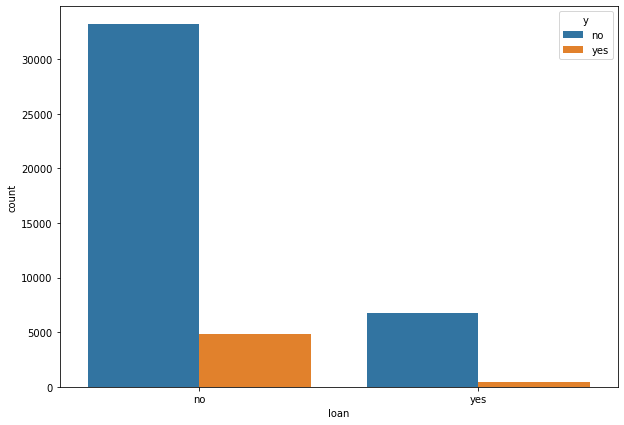

In [758]:
# # Customer Subscribed Term Deposit Based on Personal Loan
plt.figure(figsize=(10,7))
sns.countplot(bank_df['loan'], hue=bank_df['y'])
plt.show()

In [759]:
x = bank_df.groupby('loan').mean().reset_index()
x

loan        age      balance        day    duration  campaign      pdays  \
0   no  41.008823  1474.453631  15.765085  259.559275  2.750336  41.192983   
1  yes  40.555632   774.309912  16.023054  250.845389  2.834622  34.982054   

   previous  Outcome_y  
0  0.591435   0.126557  
1  0.522087   0.066814

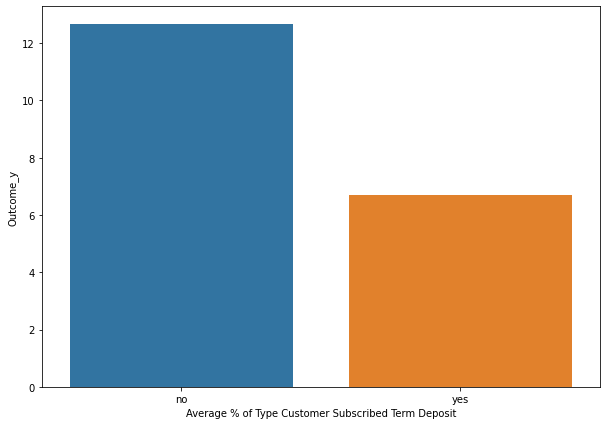

In [760]:
# % of Average Custmer who have subscribed our Product based on Personal Loan
plt.figure(figsize=(10,7))
q=sns.barplot(y=(x.Outcome_y)*100, x = x.loan)
q.set_xlabel("Average % of Type Customer Subscribed Term Deposit")
plt.show()

###**Both the housing and loan graphs have majority “subscribed no” results There is more “subscribed no” than “subscribed yes” on both the “housing” and “loan” graphs.Because both the housing and load graphs have majority “subscribed no” results, you may want to know the “subscribed yes” rate for clients that don’t have any loan (loan = no, housing = no).**

# **7. Based On Type on Contact Medium**

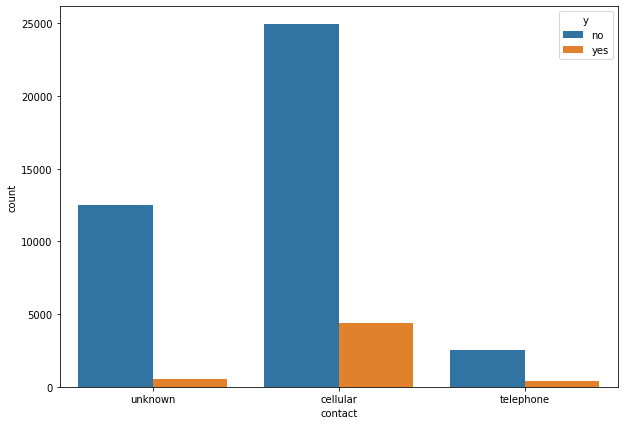

In [761]:
# # Customer Subscribed Term Deposit Based on Type of Contact Medium
plt.figure(figsize=(10,7))
sns.countplot(bank_df['contact'], hue=bank_df['y'])
plt.show()

In [762]:
x = bank_df.groupby('contact').mean().reset_index()
x

contact        age      balance        day    duration  campaign  \
0   cellular  40.400785  1397.926993  15.930306  263.013966  2.690114   
1  telephone  47.837922  1803.704061  16.557467  235.366139  3.400895   
2    unknown  40.600077  1183.550384  15.360138  252.340476  2.787481   

       pdays  previous  Outcome_y  
0  56.885129  0.804064   0.149189  
1  46.312801  0.827254   0.134205  
2   1.299386  0.021966   0.040707

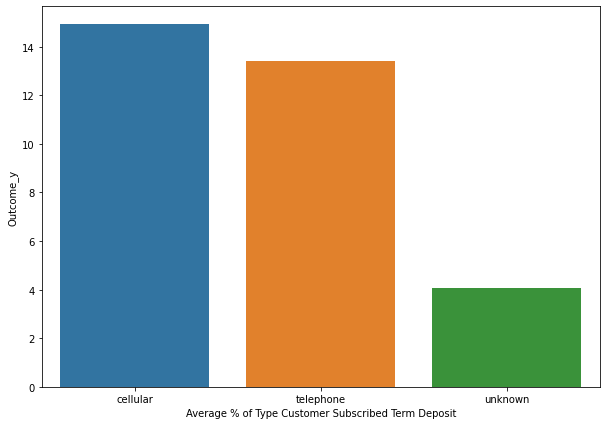

In [763]:
# % of Average Custmer who have subscribed our Product based on Type of contact
plt.figure(figsize=(10,7))
q=sns.barplot(y=(x.Outcome_y)*100, x = x.contact)
q.set_xlabel("Average % of Type Customer Subscribed Term Deposit")
plt.show()

# **8.Campaign In Month**

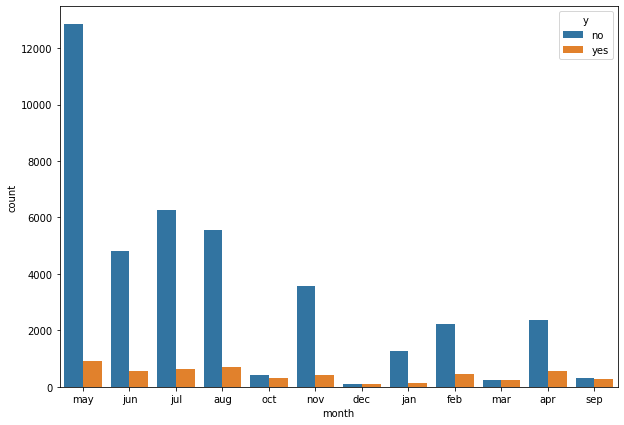

In [764]:
# # Customer Subscribed Term Deposit Based on Month
plt.figure(figsize=(10,7))
sns.countplot(bank_df['month'], hue=bank_df['y'])
plt.show()

In [765]:
count_month_response_pct = pd.crosstab(bank_df['y'],bank_df['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
count_month_response_pct

y             no        yes
month                      
apr    80.320600  19.679400
aug    88.986714  11.013286
dec    53.271028  46.728972
feb    83.352208  16.647792
jan    89.878831  10.121169
jul    90.906454   9.093546
jun    89.777195  10.222805
mar    48.008386  51.991614
may    93.280546   6.719454
nov    89.848866  10.151134
oct    56.233062  43.766938
sep    53.540587  46.459413

In [766]:
month = pd.DataFrame(bank_df['month'].value_counts())
month['% Contacted'] = month['month']*100/month['month'].sum()
month['% Subscription'] = count_month_response_pct['yes']
month.drop('month',axis = 1,inplace = True)
month = month.sort_values('% Subscription',ascending = True)
# month.rename(columns = {'index':'month'}, inplace = True)
month

% Contacted  % Subscription
may    30.448342        6.719454
jul    15.250713        9.093546
jan     3.103227       10.121169
nov     8.781049       10.151134
jun    11.813497       10.222805
aug    13.817434       11.013286
feb     5.859194       16.647792
apr     6.485147       19.679400
oct     1.632346       43.766938
sep     1.280662       46.459413
dec     0.473336       46.728972
mar     1.055053       51.991614

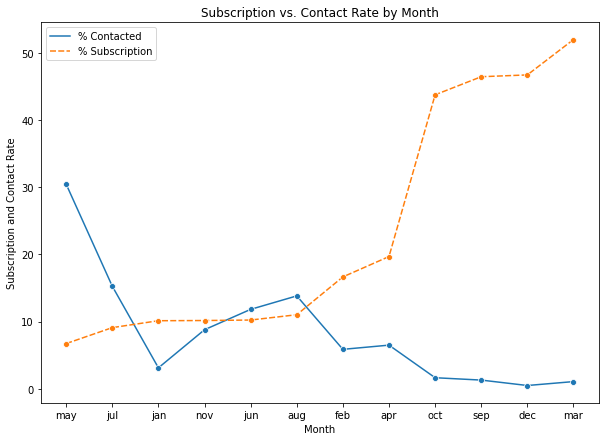

In [767]:
plt.figure(figsize=(10,7))
plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')
sns.lineplot(data=month,marker = 'o')

plt.show()

In [768]:
x = bank_df.groupby('month').mean().reset_index()


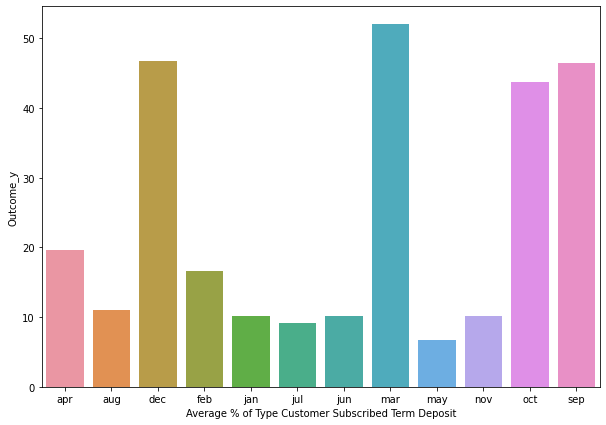

In [769]:
# % of Average Custmer who have subscribed our Product based on campaign in Month
plt.figure(figsize=(10,7))
q=sns.barplot(y=(x.Outcome_y)*100, x = x.month)
q.set_xlabel("Average % of Type Customer Subscribed Term Deposit")
plt.show()

## **Insights: initiate the telemarketing campaign in Month**

**Besides customer characteristics, external factors may also have an impact on the subscription rate, such as seasons and the time of calling. So the month of contact is also analyzed here.**

**This line chart displays the bank’s contact rate in each month as well as clients’ response rate in each month. One way to evaluate the effectiveness of the bank's marketing plan is to see whether these two lines have a similar trend over the same time horizon.**

**The bank contacted most clients between May and August. The highest contact rate is around 30%, which happened in May, while the contact rate is closer to 0 in March, September, October, and December.**

**However, the subscription rate showed a different trend. The highest subscription rate occurred in March, which is over 50%, and all subscription rates in September, October, and December are over 40%**.

**Clearly, these two lines move in different directions which strongly indicates the inappropriate timing of the bank’s marketing campaign. To improve the marketing campaign, the bank should consider initiating the telemarketing campaign in fall and spring when the subscription rate tends to be higher.**

**Nevertheless, the bank should be cautious when analyzing external factors. More data from previous marketing campaign should be collected and analyzed to make sure that this seasonal effect is constant over time and applicable to the future.**

# **9.Based On Total Call Duration**

In [770]:
x = bank_df.groupby('y').mean().reset_index()
x

y        age      balance        day    duration  campaign      pdays  \
0   no  40.838986  1303.714969  15.892290  221.182806  2.846350  36.421372   
1  yes  41.670070  1804.267915  15.158253  537.294574  2.141047  68.702968   

   previous  Outcome_y  
0  0.502154        0.0  
1  1.170354        1.0

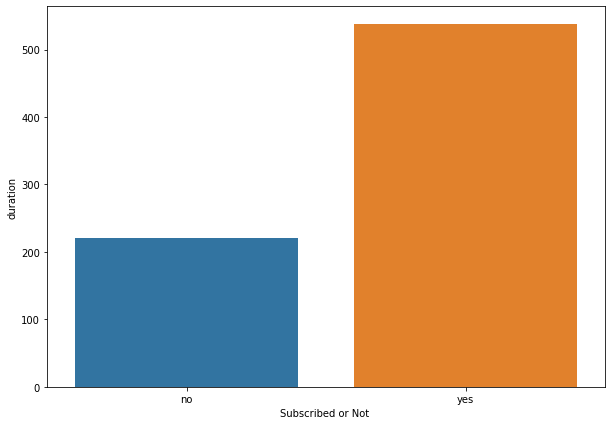

In [771]:
# % of Average Custmer who have subscribed our Product based on Call Duration in campaign
plt.figure(figsize=(10,7))
q=sns.barplot(x=x.y, y = x.duration)
q.set_xlabel("Subscribed or Not ")
plt.show()

### **As the time that clients talked gets longer, the subscription no rate gets lower.**

### **We see that the feature ‘duration’, which tells us about the duration of the last call in seconds, is more than twice for the customers who bought the products than for customers who didn’t. ‘Campaign’, which denotes the number of calls made during the current campaign, are lower for customers who purchased the products.**

# **10.Outcome of previous campaign**

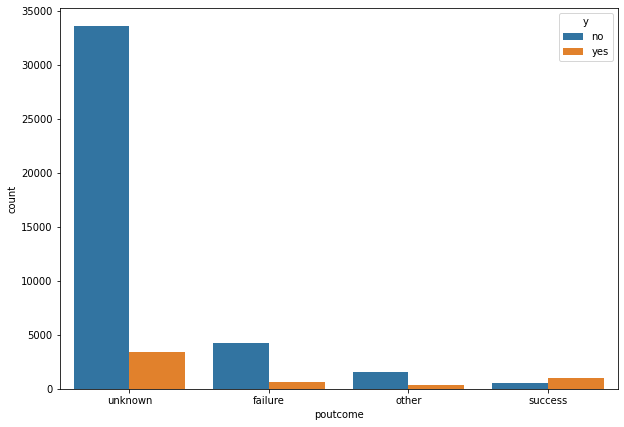

In [772]:
# Custmer who have subscribed our Product based on poutcome of previous campaign 
plt.figure(figsize=(10,7))
sns.countplot(bank_df['poutcome'], hue=bank_df['y'])
plt.show()

In [773]:
x = bank_df.groupby('poutcome').mean().reset_index()
x

poutcome        age      balance        day    duration  campaign  \
0  failure  40.786166  1465.805550  14.166701  244.185880  1.980820   
1    other  39.752174  1487.411413  14.475000  255.715217  2.461413   
2  success  42.964924  1939.301125  14.449371  316.868961  1.806089   
3  unknown  40.932114  1318.722043  16.145621  257.738332  2.921886   

        pdays  previous  Outcome_y  
0  241.509284  2.896552   0.126097  
1  229.683696  4.009239   0.166848  
2  163.259431  3.075447   0.647253  
3   -0.962039  0.000460   0.091615

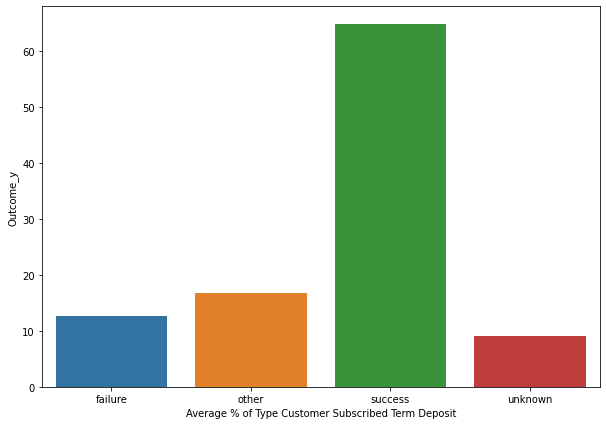

In [774]:
# % of Average Custmer who have subscribed our Product based on poutcome of previous campaign
plt.figure(figsize=(10,7))
q=sns.barplot(y=(x.Outcome_y)*100, x = x.poutcome)
q.set_xlabel("Average % of Type Customer Subscribed Term Deposit")
plt.show()

# **11.No of Call in Current Campaign**

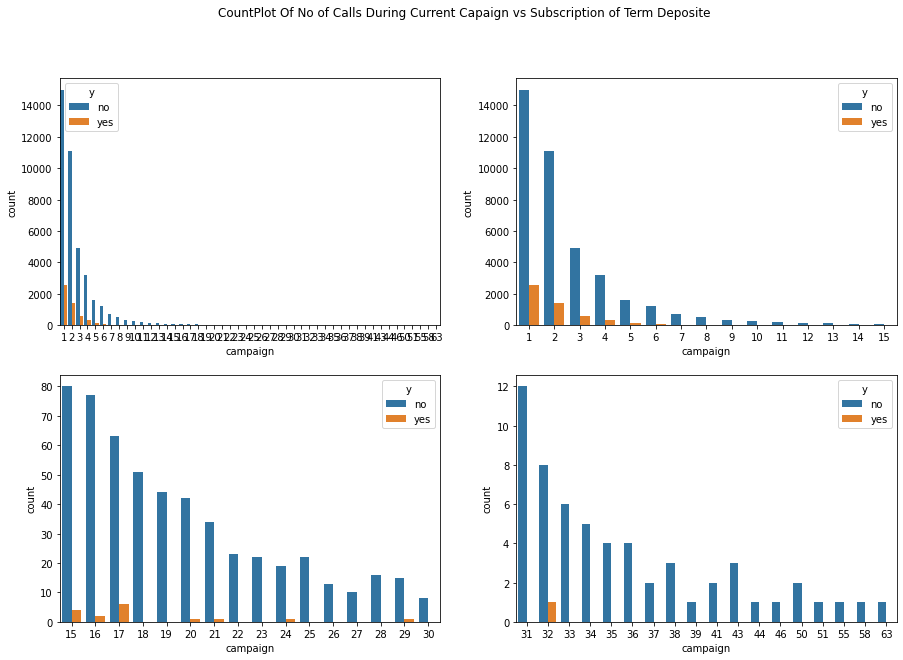

In [775]:
# Finding Relation between No of Call in Current compaign Vs Subscription of Term Deposit
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('CountPlot Of No of Calls During Current Capaign vs Subscription of Term Deposite')
# Countplot
sns.countplot(ax=axes[0,0], data=bank_df, x="campaign",hue='y')
# Countplot for less than 15 calls during campaign
sns.countplot(ax=axes[0,1], data=bank_df, x=bank_df[bank_df['campaign']<=15].campaign,hue='y')
# Countplot for between 15 to 30 calls during campaign
sns.countplot(ax=axes[1,0], data=bank_df, x=bank_df[(bank_df.campaign >= 15) & (bank_df.campaign <= 30)].campaign,hue='y')
# # Countplot formore trhan 30 calls during campaign
sns.countplot(ax=axes[1,1], data=bank_df, x=bank_df[bank_df['campaign']>30].campaign,hue='y')

# **12.No of Call in Previous Campaign**

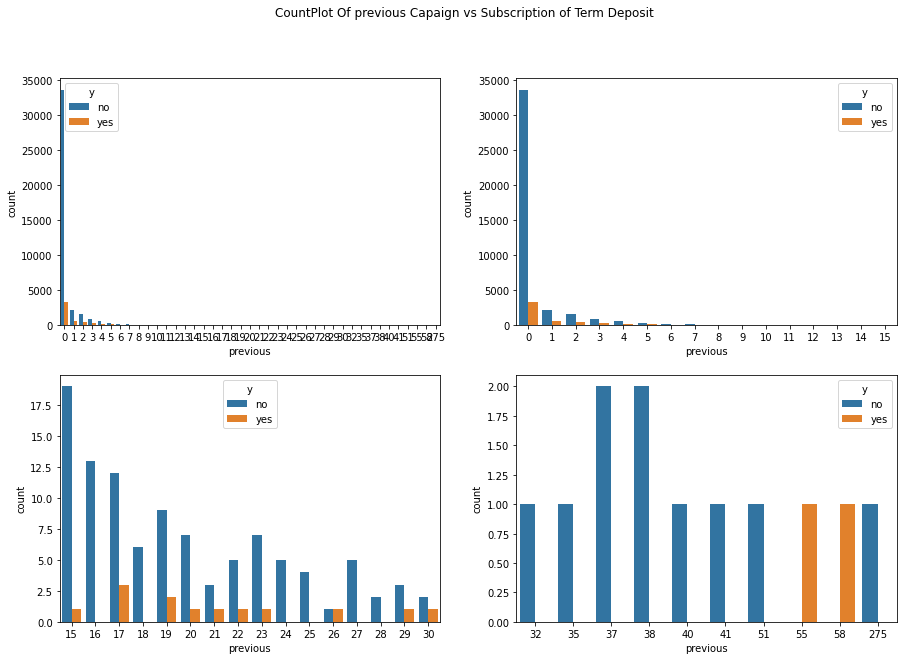

In [776]:
# Finding Relation between No of Call in previous compaign Vs Subscription of Term Deposit
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('CountPlot Of previous Capaign vs Subscription of Term Deposit')
# Countplot
sns.countplot(ax=axes[0,0], data=bank_df, x="previous",hue='y')
# Countplot for less than 15 calls during previous campaign
sns.countplot(ax=axes[0,1], data=bank_df, x=bank_df[bank_df['previous']<=15].previous,hue='y')
# Countplot for between 15 to 30 calls during  previous campaign
sns.countplot(ax=axes[1,0], data=bank_df, x=bank_df[(bank_df.previous >= 15) & (bank_df.previous <= 30)].previous,hue='y')
# # Countplot formore trhan 30 calls during previous campaign
sns.countplot(ax=axes[1,1], data=bank_df, x=bank_df[bank_df['previous']>30].previous,hue='y')

# **13. Date of Month Last time called Customer**

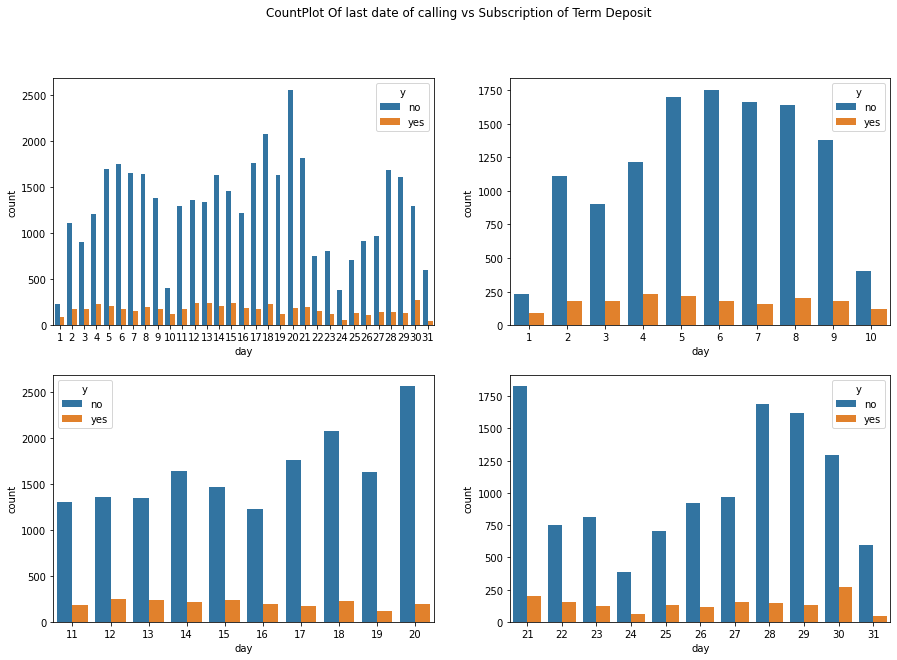

In [777]:
# Finding Relation between last date of calling Vs Subscription of Term Deposit
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('CountPlot Of last date of calling vs Subscription of Term Deposit')
# Countplot
sns.countplot(ax=axes[0,0], data=bank_df, x="day",hue='y')
# Countplot for less than 10 days of month   
sns.countplot(ax=axes[0,1], data=bank_df, x=bank_df[bank_df['day']<=10].day,hue='y')
# Countplot for 11 to 20 days of month   
sns.countplot(ax=axes[1,0], data=bank_df, x=bank_df[(bank_df['day']>10) & (bank_df['day']<=20)].day,hue='y')
# Countplot for more that 20 days of month   
sns.countplot(ax=axes[1,1], data=bank_df, x=bank_df[bank_df['day']>20].day,hue='y')

# **14.Based on Age Group**

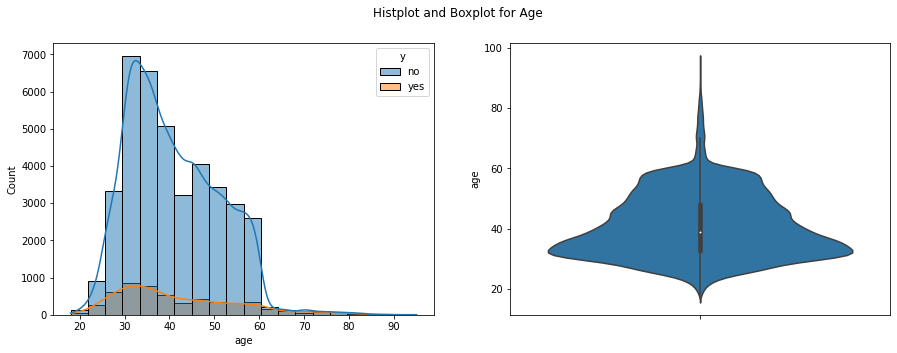

In [778]:
## Finding Relation between Age and Subscription of Term Deposit
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for Age')
# HIstplot
sns.histplot(ax=axes[0], data=bank_df, x="age",hue='y', bins=20,kde=True)
# BoxPlot
sns.violinplot(ax=axes[1],data=bank_df, y="age",hue='y',showmeans=True,showmedians=True)

In [779]:
#add a new column category next to the age group. 
category = pd.cut(bank_df.age,bins=[15,30,50,70,100],labels=['young','Adult','Upper_Middle','Elderly'])
bank_df.insert(2,'Age_Group',category)


In [780]:
x = bank_df.groupby('Age_Group').mean().reset_index()
x

Age_Group        age      balance        day    duration  campaign  \
0         young  27.462162  1019.952774  15.766287  273.296159  2.556046   
1         Adult  39.053827  1286.708014  15.829323  254.324414  2.829773   
2  Upper_Middle  55.956661  1799.680999  15.795164  254.647468  2.747833   
3       Elderly  76.815195  2916.827515  15.227926  331.010267  2.135524   

       pdays  previous  Outcome_y  
0  41.216501  0.563158   0.162873  
1  41.632822  0.589435   0.097870  
2  33.637888  0.528855   0.124886  
3  58.365503  1.213552   0.447639

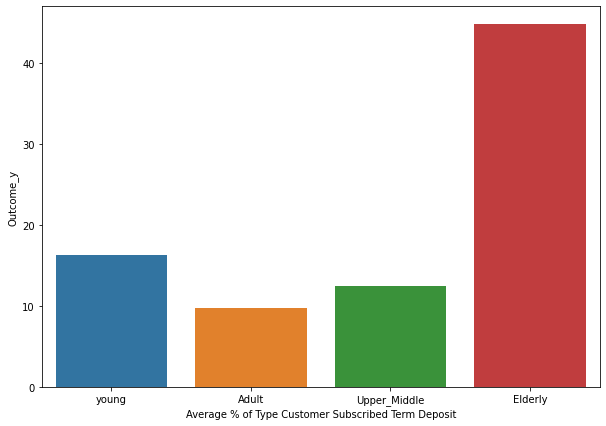

In [781]:
# % of Average Custmer who have subscribed our Product based on Age_Group
plt.figure(figsize=(10,7))
q=sns.barplot(y=(x.Outcome_y)*100, x = x.Age_Group)
q.set_xlabel("Average % of Type Customer Subscribed Term Deposit")
plt.show()

###**There are less number of clients of elderly age group. However, it has a higher subscription rate than the other age groups.The youngs age group has higher subscribed yes than the upper middle age group. But young group subscribed yes of 16 % is much lower than the  subscribed yes of elderly age group i.e. almost more than 44 %.**

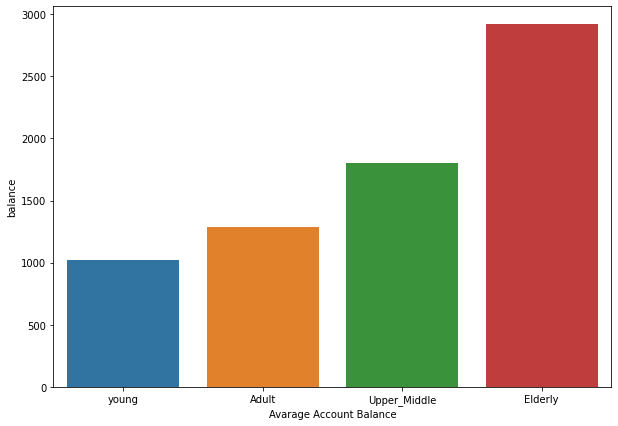

In [782]:
# Avarage  Account Balance of Custmer based on their Age Group
plt.figure(figsize=(10,7))
p=sns.barplot(y=x.balance, x = x.Age_Group)
p.set_xlabel("Avarage Account Balance")
plt.show()

# **Insights: target the youngest and the oldest instead of the middle-aged**

**Brown vertical bars indicate that clients with elderly age group have the highest subscription rate. About 17% of the subscriptions came from the clients aged between 18 to 29. Avegrage More than 60 % of the subscriptions are contributed by the youngest and the eldest clients.**

**It is not surprising to see such a pattern because the main investment objective of older people is saving for retirement while the middle-aged group tend to be more aggressive with a main objective of generating high investment income. Term deposits, as the least risky investment tool, are more preferable to the eldest**

**The youngest may not have enough money or professional knowledge to engage in sophisticated investments, such as stocks and mutual funds. Term deposits provide liquidity and generate interest incomes that are higher than the regular saving account, so term deposits are ideal investments for students.**

**However, yellow & Green vertical bars show that the bank focused its marketing efforts on the middle-aged group, which returned lower subscription rates than the younger and older groups. Thus, to make the marketing campaign more effective, the bank should target younger and older clients in the future.** 

**In its telemarketing campaigns, clients called by the bank have a wide range of age from 18 to 95 years. However, a majority of customers called are in the ages of 30s and 40s (33 to 48 years ages fall within the 25th to 75th percentiles). The distribution of customer age is fairly normal with a small standard deviation.**

**The clients over 60's has high subscription yes rate. They should be worth pursuing. Another graph will also show the subscription yes rate for each group.**

# **15. Based on the Account Balance**

Text(0.5, 0, 'Customer whose Account balance More than 20000$')

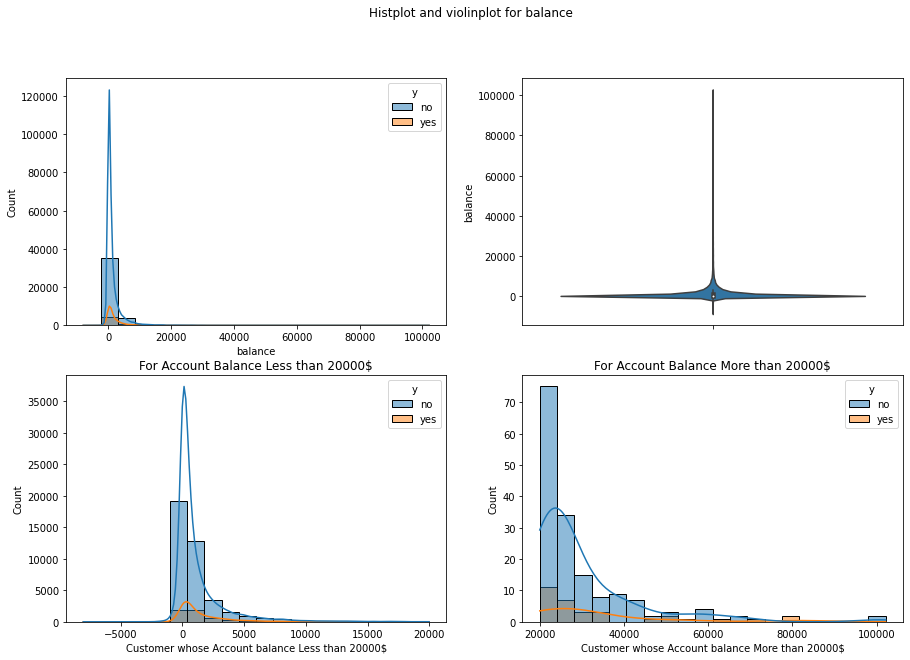

In [783]:
## Finding Relation between balance and Subscription of Term Deposit
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Histplot and violinplot for balance')
# Histplot
sns.histplot(ax=axes[0,0], data=bank_df, x="balance",hue='y', bins=20,kde=True)
# violinplot
sns.violinplot(ax=axes[0,1],data=bank_df, y="balance",hue='y',showmeans=True,showmedians=True)
# Histplot  
p=sns.histplot(ax=axes[1,0], data=bank_df, x=bank_df[bank_df['balance']<20000].balance,hue='y',bins=20,kde=True)
p.set_title('For Account Balance Less than 20000$')
p.set_xlabel('Customer whose Account balance Less than 20000$')
# Histplot   
q=sns.histplot(ax=axes[1,1], data=bank_df, x=bank_df[bank_df['balance']>20000].balance,hue='y',bins=20,kde=True)
q.set_title('For Account Balance More than 20000$')
q.set_xlabel('Customer whose Account balance More than 20000$')

In [784]:
#add a new column category next to the Balance group. 
category = pd.cut(bank_df.balance,bins=[-10000,0,5000,10000,20000,40000,60000,80000,200000],labels=['Negative','0to5k','5kto10k','10to20k','20kto40k' ,'40kyo60k','60kto80k','morethan80k'])
bank_df.insert(7,'bal_Group',category)

In [785]:
x = bank_df.groupby('bal_Group').mean().reset_index()
x

bal_Group        age       balance        day    duration  campaign  \
0     Negative  40.681868   -164.337088  16.382830  249.220604  2.999863   
1        0to5k  40.766545    992.725703  15.663056  258.568261  2.722767   
2      5kto10k  43.511905   6802.498512  16.158730  282.481151  2.684524   
3      10to20k  43.371069  13222.234277  15.915094  263.555031  2.575472   
4     20kto40k  45.321212  25532.503030  16.806061  249.806061  2.660606   
5     40kyo60k  49.050000  49369.200000  12.300000  246.650000  3.950000   
6     60kto80k  56.750000  67226.250000   8.500000  200.250000  2.500000   
7  morethan80k  69.500000  90738.000000  13.000000  326.000000  2.000000   

        pdays  previous  Outcome_y  
0   30.930357  0.399176   0.068956  
1   42.142507  0.609331   0.123867  
2   40.640873  0.707837   0.151786  
3   39.644654  0.679245   0.166667  
4   35.648485  0.527273   0.145455  
5    8.500000  0.050000   0.150000  
6   -1.000000  0.000000   0.000000  
7  101.250000  1.250000   0.500000

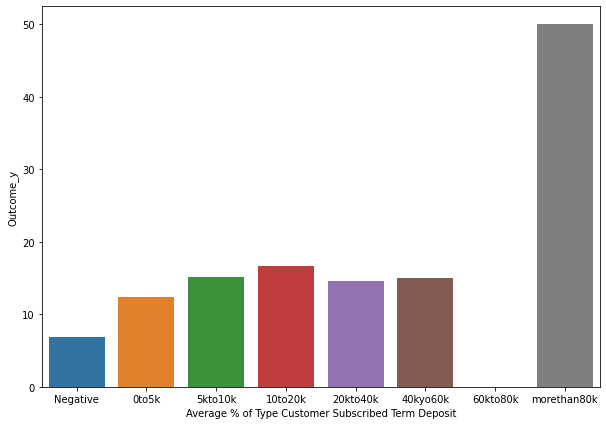

In [786]:
# % of Average Custmer who have subscribed our Product based on bal_Group
plt.figure(figsize=(10,7))
q=sns.barplot(y=(x.Outcome_y)*100, x = x.bal_Group)
q.set_xlabel("Average % of Type Customer Subscribed Term Deposit")
plt.show()

###**Unsurprisingly, this bar chart indicates a positive correlation between clients’ balance levels and subscription rate. Clients with negative balances only returned a subscription rate of 6.9% while clients with average or high balances had significantly higher subscription rates, average 15%.**

###**However, in this campaign, more than 50% of clients contacted only have a low balance level. In the future, the bank should shift its marketing focus to high-balance customers to secure more term deposits.**

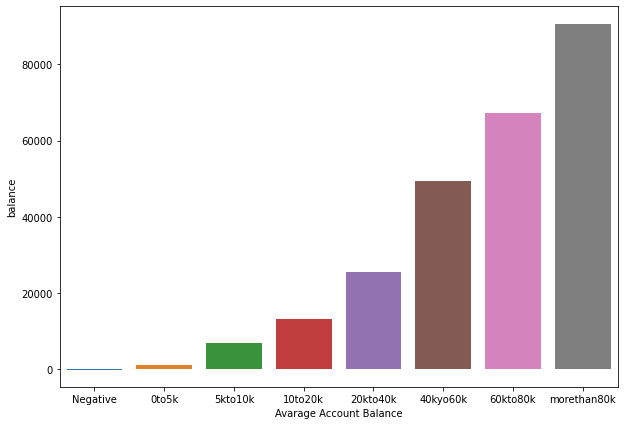

In [787]:
# Avarage  Account Balance of Custmer based on their bal_Group 
plt.figure(figsize=(10,7))
p=sns.barplot(y=x.balance, x = x.bal_Group)
p.set_xlabel("Avarage Account Balance")
plt.show()

**Insights: target older clients with high balance levels**

**While age represents a person’s life stage and balance represents a person’s financial condition, jointly evaluating the impact of these two factors enables us to investigate if there is a common trend across all ages, and to identify which combination of client features indicates the highest likelihood of subscription.**

**In order to investigate the combined effect of age and balance on a client’s decision, we performed a two-layer grouping, segmenting customers according to their balance levels within each age group.**

**The graph tells the same story regarding the subscription rate for different age groups: the willingness to subscribe is exceptionally high for people aged above 60 and younger people aged below 30 also have a distinguishable higher subscription rate than those of other age groups.**

**Furthermore, the effect of balance levels on subscription decision is applicable to each individual age group: every age group shares a common trend that the percentage of subscription increases with balance.**

**In sum, the bank should prioritize its telemarketing to clients who are above 60 years old and have positive balances, because they have the highest acceptance rate of about 35%. The next group the bank should focus on is young clients with positive balances, who showed high subscription rates between 15% and 20%.**

# **16.Based on Since No Days last Call to Customer**

Text(0.5, 0, 'More Than 365 Days No last Call to Customer')

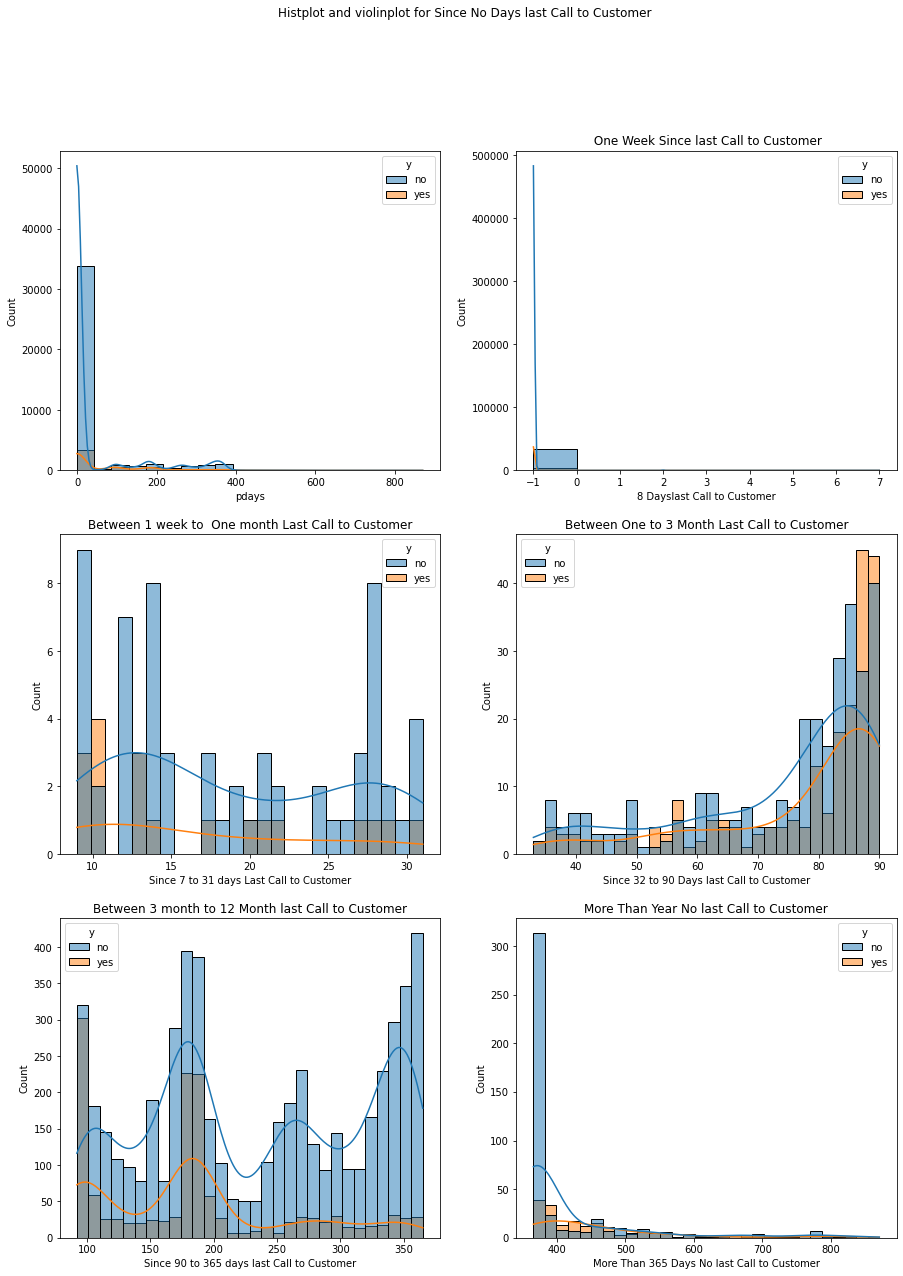

In [788]:
## Finding Relation Based on Since No Days last Call to Customer and Subscription of Term Deposit
fig, axes = plt.subplots(3, 2, figsize=(15,20))
fig.suptitle('Histplot and violinplot for Since No Days last Call to Customer')
# Histplot
sns.histplot(ax=axes[0,0], data=bank_df, x="pdays",hue='y', bins=20,kde=True)
# Histplot  
p=sns.histplot(ax=axes[0,1], data=bank_df, x=bank_df[bank_df['pdays']<8].pdays,hue='y',bins=8,kde=True)
p.set_title(' One Week Since last Call to Customer')
p.set_xlabel('8 Dayslast Call to Customer')
# Histplot  
p=sns.histplot(ax=axes[1,0], data=bank_df, x=bank_df[(bank_df['pdays']>8) & (bank_df['pdays']<=31)].pdays,hue='y',bins=25,kde=True)
p.set_title('Between 1 week to  One month Last Call to Customer')
p.set_xlabel('Since 7 to 31 days Last Call to Customer')
# Histplot  
p=sns.histplot(ax=axes[1,1], data=bank_df, x=bank_df[(bank_df['pdays']>32) & (bank_df['pdays']<=90)].pdays,hue='y',bins=30,kde=True)
p.set_title('Between One to 3 Month Last Call to Customer')
p.set_xlabel('Since 32 to 90 Days last Call to Customer')
# Histplot  
p=sns.histplot(ax=axes[2,0], data=bank_df, x=bank_df[(bank_df['pdays']>91) & (bank_df['pdays']<=365)].pdays,hue='y',bins=30,kde=True)
p.set_title('Between 3 month to 12 Month last Call to Customer')
p.set_xlabel('Since 90 to 365 days last Call to Customer')
# Histplot   
q=sns.histplot(ax=axes[2,1], data=bank_df, x=bank_df[bank_df['pdays']>365].pdays,hue='y',bins=30,kde=True)
q.set_title('More Than Year No last Call to Customer')
q.set_xlabel('More Than 365 Days No last Call to Customer')

In [789]:
#add a new column category next to the Balance group. 
category = pd.cut(bank_df.pdays,bins=[-1,8,30,60,90,180,270,365,1000],labels=['Week','Month','2Month','3rdMonth','2ndQuarter' ,'3rdQuarter','4thQuarter','morethanYear'])
bank_df.insert(16,'LastCall_Group',category)

In [790]:
x = bank_df.groupby('LastCall_Group').mean().reset_index()
x

LastCall_Group        age      balance        day    duration  campaign  \
0           Week  43.037037   711.601852  13.305556  211.879630  2.212963   
1          Month  39.737500   868.300000  13.787500  300.125000  2.225000   
2         2Month  42.273585  2611.754717  14.500000  266.424528  1.679245   
3       3rdMonth  42.134434  1981.412736  14.709906  283.275943  1.721698   
4     2ndQuarter  41.623387  2043.515726  15.210887  259.085484  1.985887   
5     3rdQuarter  42.582133  1570.208934  15.213737  264.723343  2.045149   
6     4thQuarter  38.553556  1031.345330  12.609683  255.110540  2.194516   
7   morethanYear  40.608087  1318.231726  13.752722  254.188180  2.096423   

        pdays  previous  Outcome_y  
0    4.296296  2.953704   0.092593  
1   17.387500  3.475000   0.225000  
2   45.971698  3.405660   0.377358  
3   81.997642  3.436321   0.431604  
4  130.528629  3.264919   0.274194  
5  213.395773  3.331412   0.263689  
6  328.774636  3.038560   0.101542  
7  431.542768  2.639191   0.292379

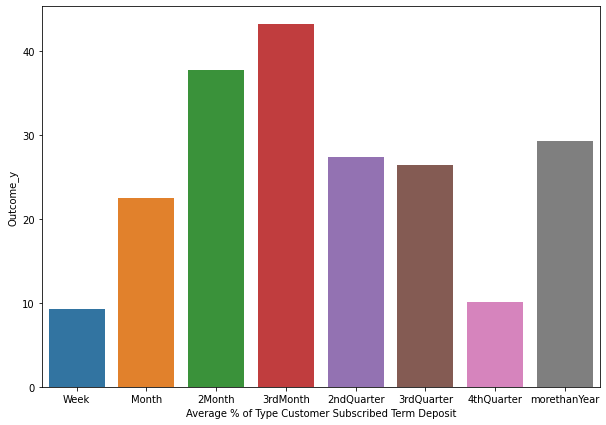

In [791]:
# % of Average Custmer who have subscribed our Product based on LastCall_Group
plt.figure(figsize=(10,7))
q=sns.barplot(y=(x.Outcome_y)*100, x = x.LastCall_Group)
q.set_xlabel("Average % of Type Customer Subscribed Term Deposit")
plt.show()


# **Handling NaN/ Null/ Missing Values and Outliers if Any**

In [792]:
bank_df2 = bank_df.copy()

## **1. Handling NaN/Null/Missing Value in dataset**

In [793]:
bank_df.isnull().sum()

age                   0
job                   0
Age_Group             0
marital               0
education             0
default               0
balance               0
bal_Group             0
housing               0
loan                  0
contact               0
day                   0
month                 0
duration              0
campaign              0
pdays                 0
LastCall_Group    36954
previous              0
poutcome              0
y                     0
Outcome_y             0
dtype: int64

In [794]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             45211 non-null  int64   
 1   job             45211 non-null  object  
 2   Age_Group       45211 non-null  category
 3   marital         45211 non-null  object  
 4   education       45211 non-null  object  
 5   default         45211 non-null  object  
 6   balance         45211 non-null  int64   
 7   bal_Group       45211 non-null  category
 8   housing         45211 non-null  object  
 9   loan            45211 non-null  object  
 10  contact         45211 non-null  object  
 11  day             45211 non-null  int64   
 12  month           45211 non-null  object  
 13  duration        45211 non-null  int64   
 14  campaign        45211 non-null  int64   
 15  pdays           45211 non-null  int64   
 16  LastCall_Group  8257 non-null   category
 17  previous    

## **SO there is no Null /NaN or Any missing Value in the above dataset**

## **2. Handling Outliers In Dataset**

In [795]:
bank_df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous     Outcome_y  
count  45211.000000  45211.000000  45211.000000  
mean      40.197828      0.580323      0.116985  
std      100.128746      2.303441      0.321406  
min       -1.000000      0.000000      0.000000  
25%       -1.000000      0.000000      0.000000  
50%       -1.000000      0.000000      0.000000  
75%       -1.000000      0.000000      0.000000  
max      871.000000    275.000000      1.000000

## **1.Handling Outliers In Feature Age**

Text(0.5, 1.0, ' Success of Previous Subscription')

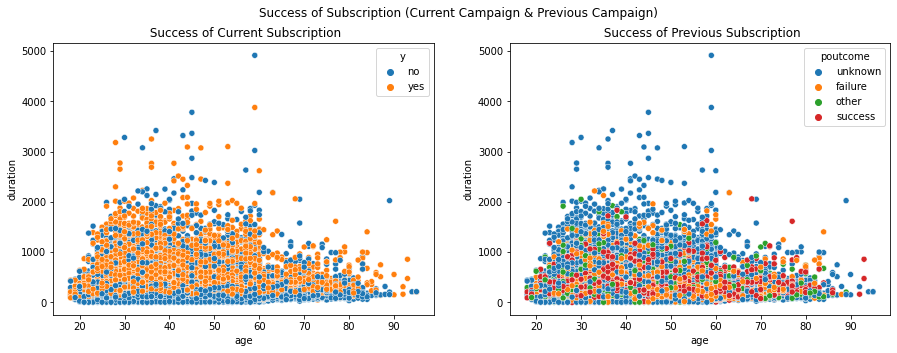

In [796]:
# Corelation Between Age & Success of Subscription (Current Campaign & Previous Campaign)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Success of Subscription (Current Campaign & Previous Campaign)')
# scatterplot
q=sns.scatterplot(ax=axes[0],x= bank_df['age'], y=bank_df['duration'], hue=bank_df['y'])
q.set_title(' Success of Current Subscription')
# scatterplot
p = sns.scatterplot(ax=axes[1],x=bank_df['age'], y=bank_df['duration'], hue=bank_df['poutcome'])
p.set_title(' Success of Previous Subscription')

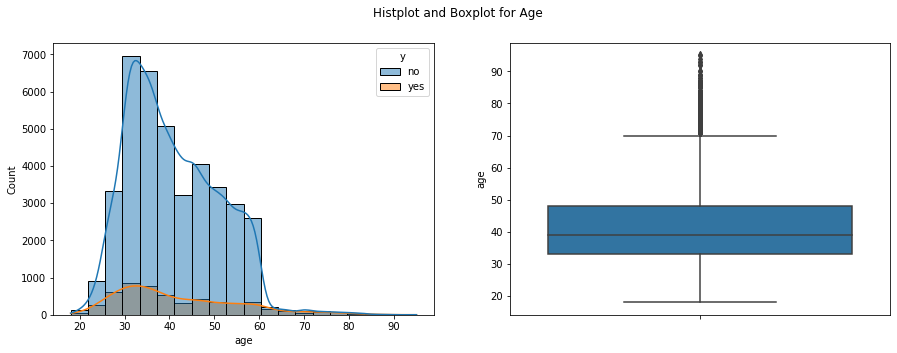

In [797]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for Age')
# HIstplot
sns.histplot(ax=axes[0], data=bank_df, x="age", bins=20,kde=True,hue=bank_df['y'])
# BoxPlot
sns.boxplot(ax=axes[1],data=bank_df, y="age")

**So In case of Feature Age Although Age is Showing Outliers to all customer who are having approximately age above 70 years, but we know that age above 70 is not outliers but its variance or spred of data, and custmer above age 70 are very important for us because they are the one who can have maximum possibility to subscribe our Term Deposit which is visible in histoplot also and in above multivariate aanalysis as well so that why we will not be removing that data.**

## **2.Handling Outliers In Feature Balance**

Text(0.5, 1.0, ' Success of Previous Subscription')

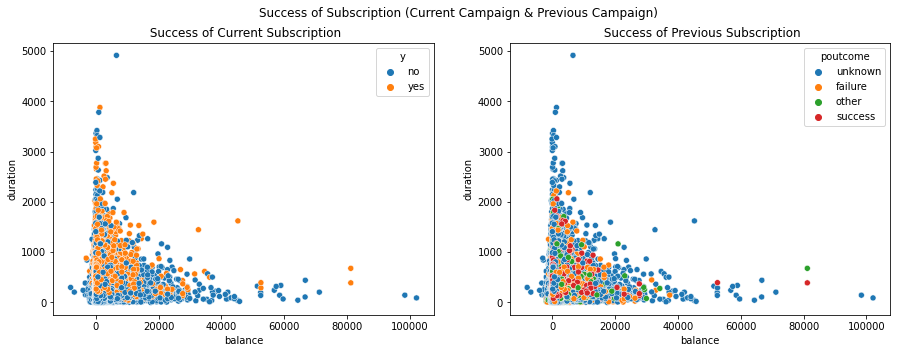

In [798]:
# Corelation Between balance & Success of Subscription (Current Campaign & Previous Campaign)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Success of Subscription (Current Campaign & Previous Campaign)')
# scatterplot
q=sns.scatterplot(ax=axes[0],x= bank_df['balance'], y=bank_df['duration'], hue=bank_df['y'])
q.set_title(' Success of Current Subscription')
# scatterplot
p = sns.scatterplot(ax=axes[1],x=bank_df['balance'], y=bank_df['duration'], hue=bank_df['poutcome'])
p.set_title(' Success of Previous Subscription')

In [799]:
#lets see percentile from 0 to 100
for i in range(0,100,10):
  balance= bank_df['balance'].values
  balance= np.sort(balance, axis= None)
  print("{} percentile value is {}".format(i, balance[int(len(balance)*(float(i)/100))]))
print("100 percentile value is ",balance[-1])

0 percentile value is -8019
10 percentile value is 0
20 percentile value is 22
30 percentile value is 131
40 percentile value is 272
50 percentile value is 448
60 percentile value is 701
70 percentile value is 1126
80 percentile value is 1859
90 percentile value is 3574
100 percentile value is  102127


In [800]:
#lets see percentile from 90 to 100 
for i in range(90,100):
  balance= bank_df['balance'].values
  balance= np.sort(balance, axis= None)
  print("{} percentile value is {}".format(i, balance[int(len(balance)*(float(i)/100))]))
print("100 percentile value is ",balance[-1])

90 percentile value is 3574
91 percentile value is 3867
92 percentile value is 4262
93 percentile value is 4688
94 percentile value is 5137
95 percentile value is 5768
96 percentile value is 6573
97 percentile value is 7780
98 percentile value is 9444
99 percentile value is 13165
100 percentile value is  102127


In [801]:
# Lets Cap Outliers @ Balance 40000 
bank_df = bank_df[bank_df.balance <= 40000]
bank_df = bank_df[bank_df.balance >= -1000]

Text(0.5, 1.0, 'After Removal of Outliers')

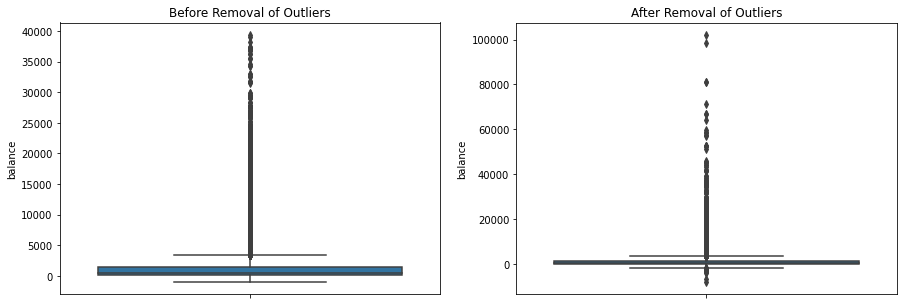

In [802]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# BoxPlot
p=sns.boxplot(ax=axes[0],data=bank_df, y="balance")
p.set_title('Before Removal of Outliers')
# BoxPlot
p=sns.boxplot(ax=axes[1],data=bank_df2, y="balance")
p.set_title('After Removal of Outliers')

In [803]:
# Bank_df Actual data(45211, 17)
bank_df.shape

(45039, 21)

## **3.Handling Outliers In Feature campaign**

Text(0.5, 1.0, ' Success of Previous Subscription')

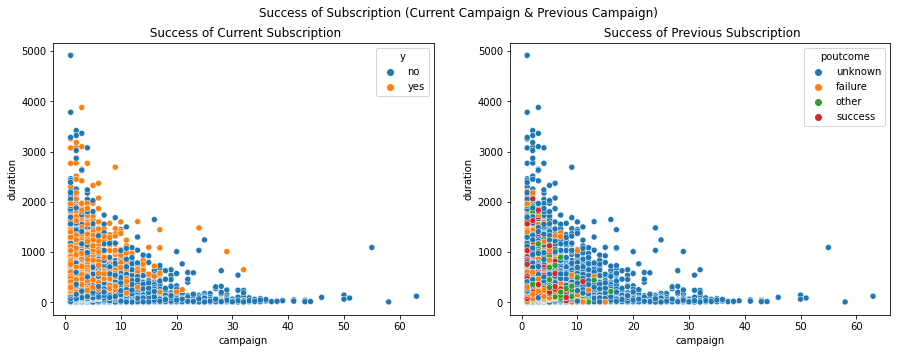

In [804]:
# Corelation Between campaign & Success of Subscription (Current Campaign & Previous Campaign)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Success of Subscription (Current Campaign & Previous Campaign)')
# scatterplot
q=sns.scatterplot(ax=axes[0],x= bank_df['campaign'], y=bank_df['duration'], hue=bank_df['y'])
q.set_title(' Success of Current Subscription')
# scatterplot
p = sns.scatterplot(ax=axes[1],x=bank_df['campaign'], y=bank_df['duration'], hue=bank_df['poutcome'])
p.set_title(' Success of Previous Subscription')

In [805]:
# Lets Cap Outliers @ campaign 32
bank_df = bank_df[bank_df.campaign <= 32]


Text(0.5, 1.0, 'After Removal of Outliers')

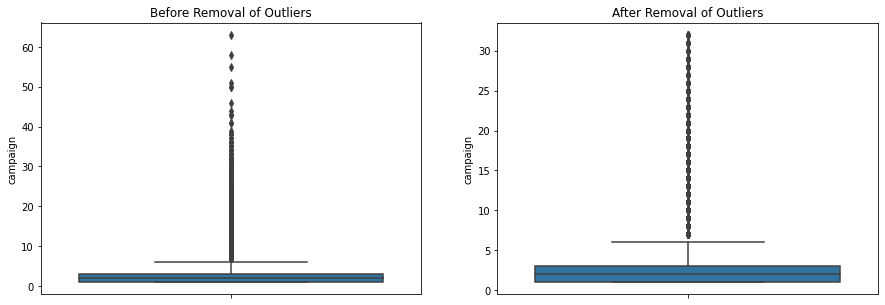

In [806]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# BoxPlot
p=sns.boxplot(ax=axes[0],data=bank_df2, y="campaign")
p.set_title('Before Removal of Outliers')
# BoxPlot
p=sns.boxplot(ax=axes[1],data=bank_df, y="campaign")
p.set_title('After Removal of Outliers')

In [807]:
bank_df.shape

(45001, 21)

## **4.Handling Outliers In Feature previous**

Text(0.5, 1.0, ' Success of Previous Subscription')

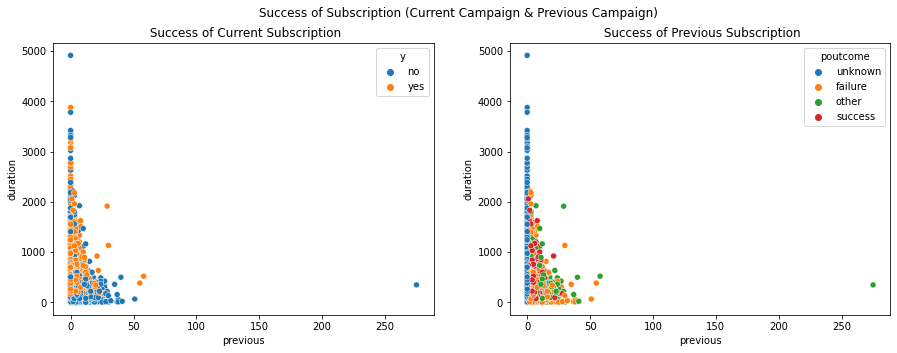

In [808]:
# Corelation Between previous & Success of Subscription (Current Campaign & Previous Campaign)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Success of Subscription (Current Campaign & Previous Campaign)')
# scatterplot
q=sns.scatterplot(ax=axes[0],x= bank_df['previous'], y=bank_df['duration'], hue=bank_df['y'])
q.set_title(' Success of Current Subscription')
# scatterplot
p = sns.scatterplot(ax=axes[1],x=bank_df['previous'], y=bank_df['duration'], hue=bank_df['poutcome'])
p.set_title(' Success of Previous Subscription')

In [809]:
# Lets Cap Outliers @ previous 30
bank_df = bank_df[bank_df.previous <= 30]


Text(0.5, 1.0, 'After Removal of Outliers')

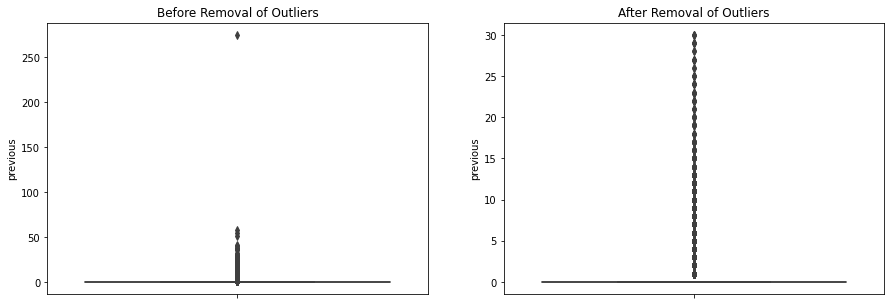

In [810]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# BoxPlot
p=sns.boxplot(ax=axes[0],data=bank_df2, y="previous")
p.set_title('Before Removal of Outliers')
# BoxPlot
p=sns.boxplot(ax=axes[1],data=bank_df, y="previous")
p.set_title('After Removal of Outliers')

In [811]:
bank_df.shape

(44989, 21)

## **5.Handling Outliers In Feature pdays**

Text(0.5, 1.0, ' Success of Previous Subscription')

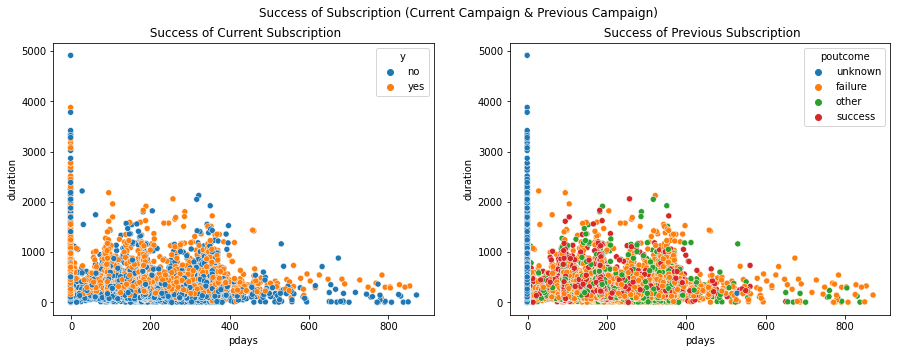

In [812]:
# Corelation Between pdays & Success of Subscription (Current Campaign & Previous Campaign)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Success of Subscription (Current Campaign & Previous Campaign)')
# scatterplot
q=sns.scatterplot(ax=axes[0],x= bank_df['pdays'], y=bank_df['duration'], hue=bank_df['y'])
q.set_title(' Success of Current Subscription')
# scatterplot
p = sns.scatterplot(ax=axes[1],x=bank_df['pdays'], y=bank_df['duration'], hue=bank_df['poutcome'])
p.set_title(' Success of Previous Subscription')

Text(0.5, 1.0, 'After Removal of Outliers')

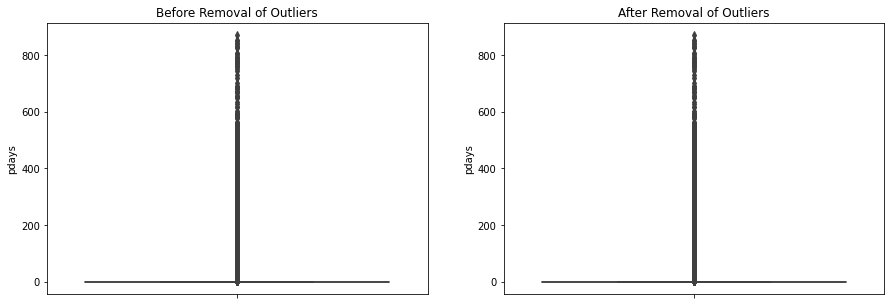

In [813]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# BoxPlot
p=sns.boxplot(ax=axes[0],data=bank_df2, y="pdays")
p.set_title('Before Removal of Outliers')
# BoxPlot
p=sns.boxplot(ax=axes[1],data=bank_df, y="pdays")
p.set_title('After Removal of Outliers')

## **6.Handling Outliers In Feature day**

Text(0.5, 1.0, ' Success of Previous Subscription')

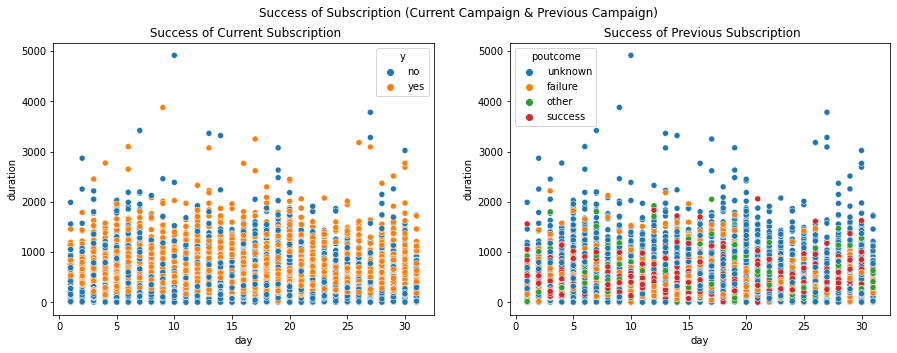

In [814]:
# Corelation Between day & Success of Subscription (Current Campaign & Previous Campaign)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Success of Subscription (Current Campaign & Previous Campaign)')
# scatterplot
q=sns.scatterplot(ax=axes[0],x= bank_df['day'], y=bank_df['duration'], hue=bank_df['y'])
q.set_title(' Success of Current Subscription')
# scatterplot
p = sns.scatterplot(ax=axes[1],x=bank_df['day'], y=bank_df['duration'], hue=bank_df['poutcome'])
p.set_title(' Success of Previous Subscription')

## **7.Handling Outliers In Feature Duration**

Text(0.5, 0.98, 'Success of Current Subscription')

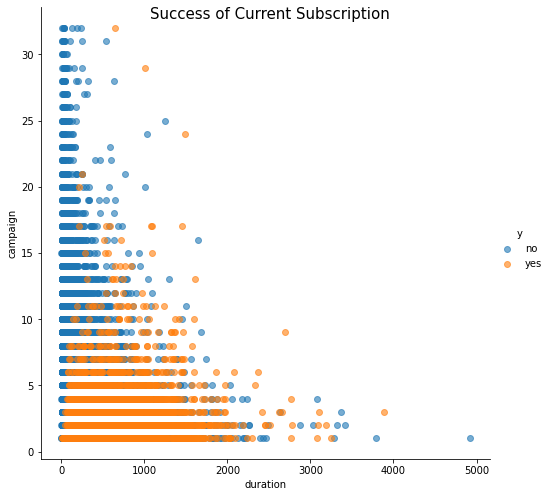

In [815]:
# Corelation Between Duration & Success of Subscription (Current Campaign & Previous Campaign)

q=sns.lmplot(x='duration', y='campaign',data = bank_df,
                     hue = 'y',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)
q.fig.suptitle("Success of Current Subscription",
                  fontsize=15, fontdict={"weight": "bold"})


Text(0.5, 0.98, 'Success of Previous Subscription')

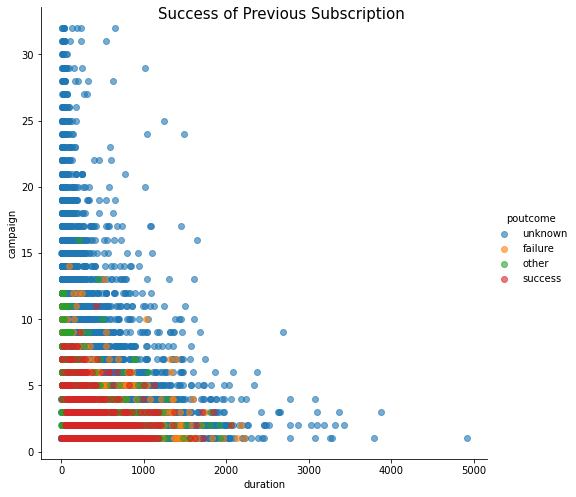

In [816]:
p = sns.lmplot(x='duration', y='campaign',data = bank_df,
                     hue = 'poutcome',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

p.fig.suptitle("Success of Previous Subscription",
                  fontsize=15, fontdict={"weight": "bold"})


**In this scatter plot, clients subscribed to term deposits are denoted as "yes" while those did not are denoted as "no".**

**As we can see from the plot, “yes” clients and “no” clients are forming two relatively separate clusters. Compared to “no” clients”, “yes” clients were contacted by fewer times and had longer call duration. More importantly, after five campaign calls, clients are more likely to reject the term deposit unless the duration is high. Most “yes” clients were approached by less than 10 times.**

**This suggests that the bank should resist calling a client for more than five times, which can be disturbing and increase dissatisfaction.**

In [817]:
# Lets Cap Outliers @ previous 30
bank_df = bank_df[bank_df.duration <= 4000]

### **So Consistaly we have seen for all features there is not any subscription of our plan even in Current Campaign as well as for previous campaign  where call duration is more than 4000 seconds so thats why capping outliers where call duration is beyond 4000 seconds.**

# **Feature Engineering**

##**Since machine learning algorithms only take numerical values, all five categorical variables (job, education, default, housing and loan) are transformed into dummy variables.Dummy variables were used instead of continuous integers because these categorical variables are not ordinal. They simply represent different types rather than levels, so dummy variables are ideal to distinguish the effect of different categories.**

# **1.Creation of New Feature by Lable Encoding & One hot Encoding**

##**I. First Lets Convert Categorical Fetaure which are having two class output (Yes/No) into Neumarical Feaures because Machine Learning Algorithem Only Accept Neumarical Features.**

In [818]:
bank_df.drop(['y','LastCall_Group'], axis = 1, inplace =True)

In [819]:
bank_df['default'] = (bank_df['default']=='yes').astype(int)
bank_df['housing'] = (bank_df['housing']=='yes').astype(int)
bank_df['loan'] = (bank_df['loan']=='yes').astype(int)
bank_df.head()

age           job     Age_Group  marital  education  default  balance  \
0   58    management  Upper_Middle  married   tertiary        0     2143   
1   44    technician         Adult   single  secondary        0       29   
2   33  entrepreneur         Adult  married  secondary        0        2   
3   47   blue-collar         Adult  married    unknown        0     1506   
4   33       unknown         Adult   single    unknown        0        1   

  bal_Group  housing  loan  contact  day month  duration  campaign  pdays  \
0     0to5k        1     0  unknown    5   may       261         1     -1   
1     0to5k        1     0  unknown    5   may       151         1     -1   
2     0to5k        1     1  unknown    5   may        76         1     -1   
3     0to5k        1     0  unknown    5   may        92         1     -1   
4     0to5k        0     0  unknown    5   may       198         1     -1   

   previous poutcome  Outcome_y  
0         0  unknown          0  
1         0  unknown          0  
2         0  unknown          0  
3         0  unknown          0  
4         0  unknown          0

### **Since the label of the data-sets which are given in terms of ‘yes’ and ‘no’, it’s necessary to replace them with numbers, possibly with 1 and 0 respectively, so that they can be used in modelling of the data. In the first step we will convert the output labels of the data-set from binary strings of yes/no to integers 1/0.**

##**II. Now Lets Convert Remaining Categorical Fetaure into Neumarical Feaures because Machine Learning Algorithem Only Accept Neumarical Features.**

### **These variables are known as categorical variables and in terms of pandas, these are called ‘object’. To retrieve information using the categorical variables, we need to convert them into ‘dummy’ variables so that they can be used for modelling. We do that using pandas.get_dummies feature. First we create a list of the categorical variables then we will use one hot encoding for creating dummy variable.**

In [820]:
# find categorical variables
categorical = [var for var in bank_df.columns if bank_df[var].dtype !='int']
print('There are {} categorical variables'.format(len(categorical)))
categorical

There are 8 categorical variables


['job',
 'Age_Group',
 'marital',
 'education',
 'bal_Group',
 'contact',
 'month',
 'poutcome']

In [821]:
# Number of labels: cardinality
#Let's now check if our categorical variables have a huge number of categories. 
#This may be a problem for some machine learning models.
for var in categorical:
  print('--'*50)
  print(var, ' contains ', bank_df[var].unique(), ' labels')
  print(var, ' contains ', len(bank_df[var].unique()), ' labels')

----------------------------------------------------------------------------------------------------
job  contains  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']  labels
job  contains  12  labels
----------------------------------------------------------------------------------------------------
Age_Group  contains  ['Upper_Middle', 'Adult', 'young', 'Elderly']
Categories (4, object): ['young' < 'Adult' < 'Upper_Middle' < 'Elderly']  labels
Age_Group  contains  4  labels
----------------------------------------------------------------------------------------------------
marital  contains  ['married' 'single' 'divorced']  labels
marital  contains  3  labels
----------------------------------------------------------------------------------------------------
education  contains  ['tertiary' 'secondary' 'unknown' 'primary']  labels
education  contains  4  labels
-------------------------

**. Lets Use One hot Encoding to create Dummy Variable of following Multiclass Features from the Data.**

In [822]:
#Creation of Dummy Feature By One hot Encoding
bank_df = pd.get_dummies(bank_df, columns = ['job','marital','education','contact', 'poutcome'],prefix=['job','marital','education','contact', 'poutcome'])

## **III. Lets Use lable Encoding to Convert Month Feature into Numarical Feature**

In [823]:
# Lets map the month Feature into Numarical feature
bank_df['Month'] = bank_df['month'].map({'dec':0,'mar':1,'sep':2,'oct':3,'jan':4,'feb':5,'apr':6,'nov':7,'jun':8,'aug':9,'jul':10,'may':11})


### **You can understand, how the categorical variables are converted to dummy variables which are ready to be used in the modelling of this data-set. But, we have a slight problem here. The some categorical variables still exist and they need to be removed to make the data-frame ready for machine learning.** 

In [824]:
# Lets Drop the Other Variable which we have converted into Numarical Features
bank_df.drop(['Age_Group','bal_Group','month'],axis= 1, inplace = True)

In [825]:
bank_df['y']= bank_df['Outcome_y']

In [827]:
# Lets Drop the Other Variable which we have converted into Numarical Features
bank_df.drop('Outcome_y',axis= 1, inplace = True)

## **So Now our dataset is having no null or any missing value and all Numarical Features So now lets check the corelation between the different Features aandf then select dependant & Indepedent features Accordingaly.**

# **Dealing with Data Imbalance**

In [594]:
bank_df.y.value_counts()

0    39711
1     5277
Name: y, dtype: int64

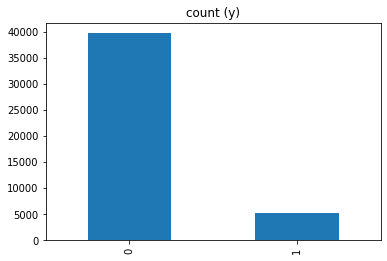

In [ ]:
bank_df.y.value_counts().plot(kind='bar', title='count (y)')

In [828]:
new_df= bank_df.copy()

# **Lets Normalize dataset**

In [829]:
from sklearn import preprocessing
import pandas as pd
scaler = preprocessing.MinMaxScaler()
names = new_df.columns
d = scaler.fit_transform(new_df)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

age  default   balance  housing  loan       day  duration  campaign  \
0  0.519481      0.0  0.077803      1.0   0.0  0.133333  0.067251       0.0   
1  0.337662      0.0  0.025456      1.0   0.0  0.133333  0.038907       0.0   
2  0.194805      0.0  0.024787      1.0   1.0  0.133333  0.019583       0.0   
3  0.376623      0.0  0.062030      1.0   0.0  0.133333  0.023705       0.0   
4  0.194805      0.0  0.024762      0.0   0.0  0.133333  0.051018       0.0   

   pdays  previous  ...  education_unknown  contact_cellular  \
0    0.0       0.0  ...                0.0               0.0   
1    0.0       0.0  ...                0.0               0.0   
2    0.0       0.0  ...                0.0               0.0   
3    0.0       0.0  ...                1.0               0.0   
4    0.0       0.0  ...                1.0               0.0   

   contact_telephone  contact_unknown  poutcome_failure  poutcome_other  \
0                0.0              1.0               0.0             0.0   
1                0.0              1.0               0.0             0.0   
2                0.0              1.0               0.0             0.0   
3                0.0              1.0               0.0             0.0   
4                0.0              1.0               0.0             0.0   

   poutcome_success  poutcome_unknown  Month    y  
0               0.0               1.0    1.0  0.0  
1               0.0               1.0    1.0  0.0  
2               0.0               1.0    1.0  0.0  
3               0.0               1.0    1.0  0.0  
4               0.0               1.0    1.0  0.0  

[5 rows x 38 columns]

### **The distribution of the target subscribed parameter is skewed since the 'subscribed no' is almost 8 times the 'subscribed yes'. The 'class_weight' parameter was used in the Machine Learning models to search for the best fitting parameter.**
### **So Dependent Variable is having issue of class imbalance so if we use such data for implementation of our model then it will be having tendency to lean towards majority Class and it may predict our data wrongely so thats why let balnce classes before implementing it on Machine learning Models.**

# **Synthetic Minority Oversampling Technique (SMOTE)**

In [830]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(scaled_df.iloc[:,0:-1], scaled_df['y'])

print('Original dataset shape', len(scaled_df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 44988
Resampled dataset shape 79422


In [831]:
# So now class is balanced
y_smote.value_counts()

0.0    39711
1.0    39711
Name: y, dtype: int64

In [832]:
x_smote.head()

age  default   balance  housing  loan       day  duration  campaign  \
0  0.519481      0.0  0.077803      1.0   0.0  0.133333  0.067251       0.0   
1  0.337662      0.0  0.025456      1.0   0.0  0.133333  0.038907       0.0   
2  0.194805      0.0  0.024787      1.0   1.0  0.133333  0.019583       0.0   
3  0.376623      0.0  0.062030      1.0   0.0  0.133333  0.023705       0.0   
4  0.194805      0.0  0.024762      0.0   0.0  0.133333  0.051018       0.0   

   pdays  previous  ...  education_tertiary  education_unknown  \
0    0.0       0.0  ...                 1.0                0.0   
1    0.0       0.0  ...                 0.0                0.0   
2    0.0       0.0  ...                 0.0                0.0   
3    0.0       0.0  ...                 0.0                1.0   
4    0.0       0.0  ...                 0.0                1.0   

   contact_cellular  contact_telephone  contact_unknown  poutcome_failure  \
0               0.0                0.0              1.0               0.0   
1               0.0                0.0              1.0               0.0   
2               0.0                0.0              1.0               0.0   
3               0.0                0.0              1.0               0.0   
4               0.0                0.0              1.0               0.0   

   poutcome_other  poutcome_success  poutcome_unknown  Month  
0             0.0               0.0               1.0    1.0  
1             0.0               0.0               1.0    1.0  
2             0.0               0.0               1.0    1.0  
3             0.0               0.0               1.0    1.0  
4             0.0               0.0               1.0    1.0  

[5 rows x 37 columns]

# **CASE I**
# **I. With Duration Feature**


# **Finding correlation in variables (both dependent and independent**

## **1. Lets Use Corelation Heatmap to check corelation between Features**

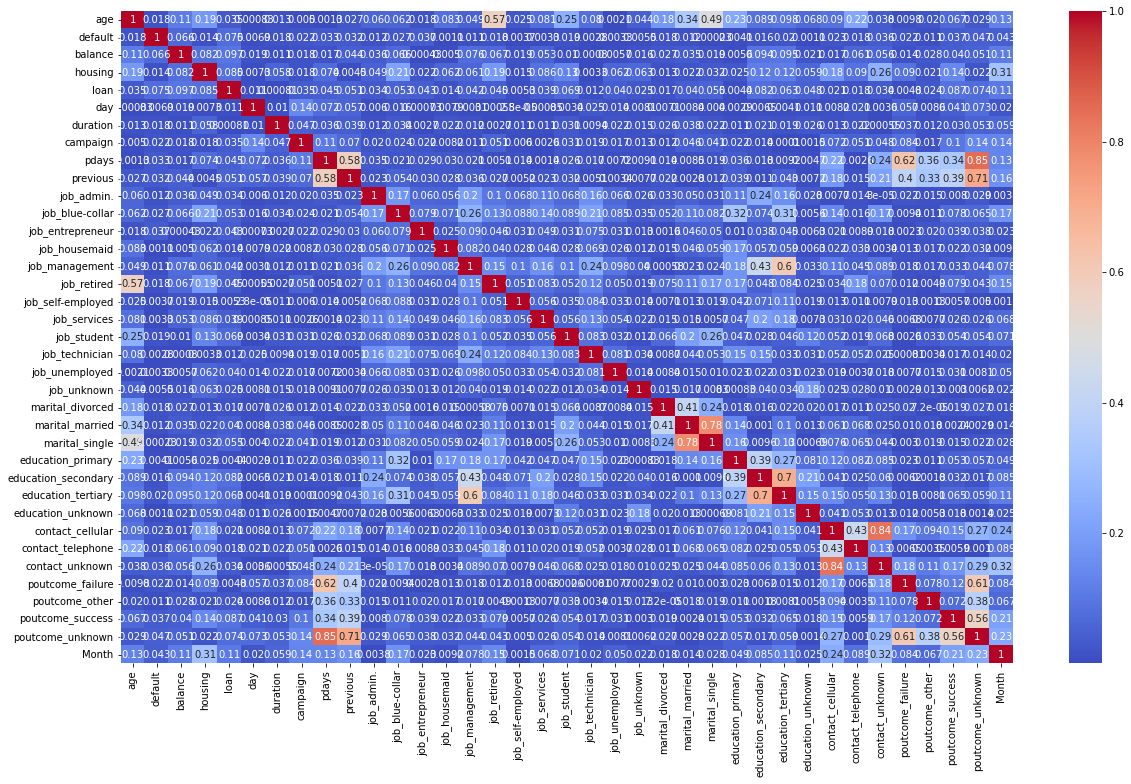

In [ ]:
#Lets find Corelatrion ship between independent features
plt.figure(figsize=(20,12))
correlation = x_smote.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

### **So from above Corelarion Matrix we can get that some of the features are highely corelated with each other, So we have to reduce multicolinearity between independent features, So just before that lets find out Feature Importance of independent features then we can select independent features for model based on corelation matrix and feature importance.**

# **2. Feature importance**

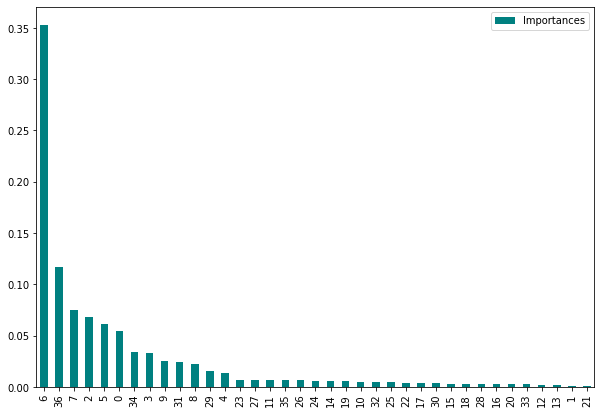

In [ ]:

from sklearn.ensemble import RandomForestClassifier
  # Create the random forest eith hyperparameters
model= RandomForestClassifier(n_estimators=340)
  # Fit the mmodel
model.fit(x_smote, y_smote)
  # get the importance of thr resulting features
importances= model.feature_importances_
  # Create a data frame for visualization
final_df= pd.DataFrame({"Features": pd.DataFrame(x_smote).columns, "Importances": importances})
final_df.set_index('Importances')
  # Sort in ascending order to better visualization
final_df= final_df.sort_values('Importances',ascending= False)
  # Plot the feature importances in bars
final_df.plot.bar(color='teal',figsize=(10,7))

In [ ]:
# Feature Importance of the Independent Features
final_df

Features  Importances
6              duration     0.353120
36                Month     0.117141
7              campaign     0.075305
2               balance     0.068049
5                   day     0.061865
0                   age     0.054233
34     poutcome_success     0.033887
3               housing     0.032954
9              previous     0.025531
31      contact_unknown     0.024145
8                 pdays     0.022575
29     contact_cellular     0.015451
4                  loan     0.013303
23      marital_married     0.006977
27   education_tertiary     0.006840
11      job_blue-collar     0.006570
35     poutcome_unknown     0.006468
26  education_secondary     0.006405
24       marital_single     0.006156
14       job_management     0.006084
19       job_technician     0.005944
10           job_admin.     0.005228
32     poutcome_failure     0.005070
25    education_primary     0.004539
22     marital_divorced     0.004016
17         job_services     0.003977
30    contact_telephone     0.003739
15          job_retired     0.003458
18          job_student     0.003438
28    education_unknown     0.003108
16    job_self-employed     0.002634
20       job_unemployed     0.002596
33       poutcome_other     0.002536
12     job_entrepreneur     0.002421
13        job_housemaid     0.001994
1               default     0.001508
21          job_unknown     0.000735

### **'duration' is the most important feature and variables related to 'job' are the least significant.**

### **Since there are too many features, we can choose some of the most important features withthe help feature importance value of features.**

### **Now Lets Select The Features which are having Feature Importance with respective Dependent Feature greter than 0.01 for implementing Machine Learning Model**

In [ ]:
new_df =x_smote[final_df[final_df.Importances>0.01].Features.to_list()]

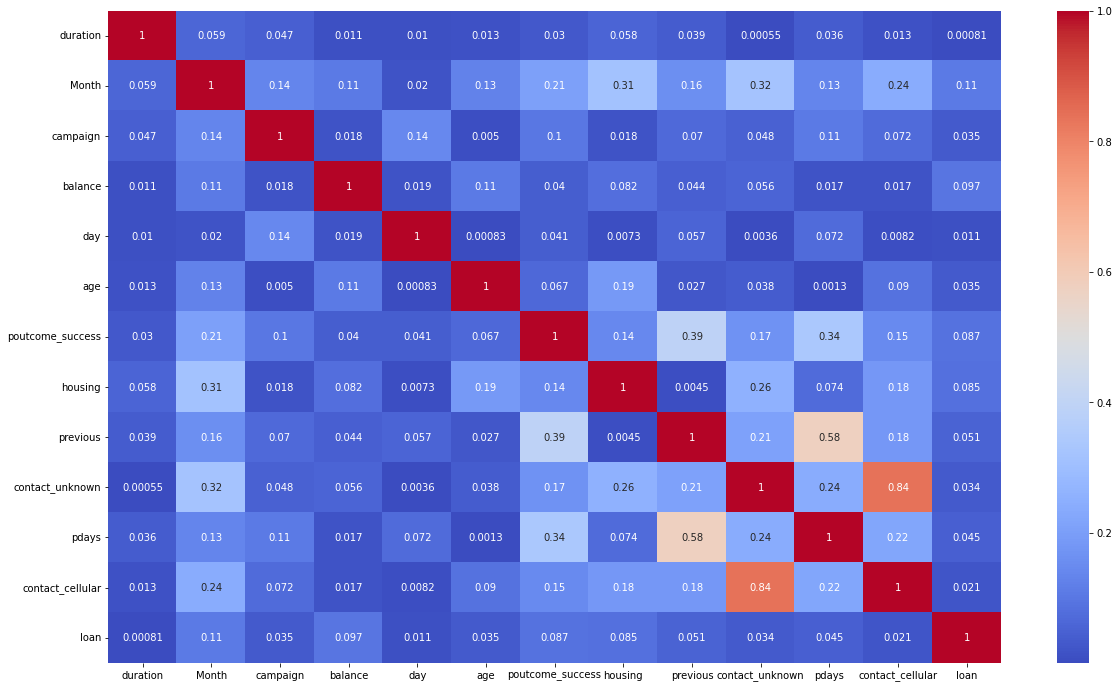

In [ ]:
#Lets find Corelatrion ship between independent features
plt.figure(figsize=(20,12))
correlation = new_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

## **So now lets drop highely corelated feature which are having corelation more than 0.4 in order to avoid Multicolinearity between the features by considering the Feature Importance of the respective features.**

In [ ]:
new_df.drop (['contact_cellular','pdays'],axis =1 , inplace = True)

In [ ]:
independent_variables= new_df.columns.to_list()
print(f'independent_variables are {independent_variables}')

dependent_variables = 'y'
print(f'independent_variables are {dependent_variables}')

independent_variables are ['duration', 'Month', 'campaign', 'balance', 'day', 'age', 'poutcome_success', 'housing', 'previous', 'contact_unknown', 'loan']
independent_variables are y


In [ ]:
# Creating the dataset with all independent variables
X = x_smote[independent_variables]

# Creating the dataset with the dependent variable
Y = y_smote

In [ ]:
print(X.shape,Y.shape)

(79422, 11) (79422,)


In [ ]:
#Lets Split The dataset Into Test & Train dataset
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0,stratify= Y)

# **Machine Learing Classification Modeling**

### **The main objective of this project is to identify the most responsive customers before the marketing campaign so that the bank will be able to efficiently reach out to them, saving time and marketing resources. To achieve this objective, classification algorithms will be employed. By analyzing customer statistics, a classification model will be built to classify all clients into two groups: "yes" to term deposits and "no" to term deposits.**

In [ ]:

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

# **1. RandomForestClassifier**

In [ ]:
# Hyperparameter tuning for Random Forest Classifier
classifier = RandomForestClassifier() 
grid_values = {'n_estimators':[50,100,300,500], 'max_depth':[5, 7,10]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)
classifier.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 7, 10],
                         'n_estimators': [50, 100, 300, 500]},
             scoring='roc_auc')

In [ ]:
classifier.best_score_

0.9702502353682718

In [ ]:
classifier.best_params_

{'max_depth': 10, 'n_estimators': 300}

In [ ]:
y_pred  =  classifier.predict(X_test)
y_pred_train  =  classifier.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

print(f'Accuracy Score for Test Data is {accuracy_score(y_test,y_pred)}')
print(f'Accuracy Score for Train Data is {accuracy_score(y_train,y_pred_train)}')


Accuracy Score for Test Data is 0.9024476228847703
Accuracy Score for Train Data is 0.9173857569754558


In [ ]:

print(f'roc_auc_score Score for Test Data is {roc_auc_score(y_test,y_pred)}')
print(f'roc_auc_score Score for Train Data is {roc_auc_score(y_train,y_pred_train)}')

roc_auc_score Score for Test Data is 0.9024476228847704
roc_auc_score Score for Train Data is 0.9173857569754558


In [ ]:
confusion_matrix(y_test, y_pred)
print('confusion_matrix  for Test Data is')
print(confusion_matrix(y_test, y_pred))
print('confusion_matrix  for Train Data is')
print(confusion_matrix(y_train,y_pred_train))

confusion_matrix  for Test Data is
[[8516 1412]
 [ 525 9403]]
confusion_matrix  for Train Data is
[[26168  3615]
 [ 1306 28477]]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_recall_curve

In [ ]:
# Print the classification report for train and test
print(classification_report(y_train,y_pred_train))
print("\n")
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91     29783
         1.0       0.89      0.96      0.92     29783

    accuracy                           0.92     59566
   macro avg       0.92      0.92      0.92     59566
weighted avg       0.92      0.92      0.92     59566



              precision    recall  f1-score   support

         0.0       0.94      0.86      0.90      9928
         1.0       0.87      0.95      0.91      9928

    accuracy                           0.90     19856
   macro avg       0.91      0.90      0.90     19856
weighted avg       0.91      0.90      0.90     19856



##**Classification report shows the precision, recall, F1 and support scores for the Random Forest Classifier model.**

**1. Precision of 0 (the client said no) represents that for all instances predicted as no subscription, the percentage of clients that actually said no is 94% & the percentage of clients that actually said Yes is 87%.**

**2. Recall is the ability of a classifier to find all positive instances. Recall of 0 indicates that for all clients that actually said no, the model predicts 86% correctly that they would decline the offer & 95% correctly that they would accept the offer.**

**3. In general, the report shows that Random Forest Classifier model has great predictive power to identify the customers who would subscribe to the term deposit.**

# **2.Naive Bayes Algorithm**

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred  =  classifier_nb.predict(X_test)
y_pred_train  =  classifier_nb.predict(X_train)

In [ ]:
print(f'Accuracy Score for Test Data is {accuracy_score(y_test,y_pred)}')
print(f'Accuracy Score for Train Data is {accuracy_score(y_train,y_pred_train)}')

Accuracy Score for Test Data is 0.7820809830781628
Accuracy Score for Train Data is 0.7844575764697982


In [ ]:
#roc_auc_score
print(f'roc_auc_score Score for Test Data is {roc_auc_score(y_test,y_pred)}')
print(f'roc_auc_score Score for Train Data is {roc_auc_score(y_train,y_pred_train)}')

roc_auc_score Score for Test Data is 0.7820809830781628
roc_auc_score Score for Train Data is 0.7844575764697981


In [ ]:
confusion_matrix(y_test, y_pred)
print('confusion_matrix  for Test Data is')
print(confusion_matrix(y_test, y_pred))
print('confusion_matrix  for Train Data is')
print(confusion_matrix(y_train,y_pred_train))

confusion_matrix  for Test Data is
[[8481 1447]
 [2880 7048]]
confusion_matrix  for Train Data is
[[25543  4240]
 [ 8599 21184]]


In [ ]:
# Print the classification report for train and test
print(classification_report(y_train,y_pred_train))
print("\n")
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.86      0.80     29783
         1.0       0.83      0.71      0.77     29783

    accuracy                           0.78     59566
   macro avg       0.79      0.78      0.78     59566
weighted avg       0.79      0.78      0.78     59566



              precision    recall  f1-score   support

         0.0       0.75      0.85      0.80      9928
         1.0       0.83      0.71      0.77      9928

    accuracy                           0.78     19856
   macro avg       0.79      0.78      0.78     19856
weighted avg       0.79      0.78      0.78     19856



##**Classification report shows the precision, recall, F1 and support scores for the Naive Bayes Algorithm model.**

**1. Precision of 0 (the client said no) represents that for all instances predicted as no subscription, the percentage of clients that actually said no is 75% & the percentage of clients that actually said Yes is 83%.**

**2. Recall is the ability of a classifier to find all positive instances. Recall of 0 indicates that for all clients that actually said no, the model predicts 85% correctly that they would decline the offer & 71% correctly that they would accept the offer.**

**3. In general, the report shows that Naive Bayes Algorithm  model has showing moderate predictive power to identify the customers who would subscribe to the term deposit.**

# **3.Support vector classifier**

In [ ]:
from sklearn.svm import SVC #Support vector classifier
from sklearn import datasets, metrics, model_selection, svm

In [ ]:
# Lets Apply Support vector classifier along GridSearchCV for hyperparameter tuning
model = SVC( gamma ='scale')
params={'C':[ 5,10],
        'kernel' : ['rbf', 'sigmoid']}
gs=GridSearchCV(estimator=model, param_grid=params, cv=5,verbose= 2)
# now fit the dataset to the GridSearchCV object. 
gs = gs.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ....................................C=5, kernel=rbf; total time= 1.3min
[CV] END ....................................C=5, kernel=rbf; total time= 1.3min
[CV] END ....................................C=5, kernel=rbf; total time= 1.3min
[CV] END ....................................C=5, kernel=rbf; total time= 1.3min
[CV] END ....................................C=5, kernel=rbf; total time= 1.3min
[CV] END ................................C=5, kernel=sigmoid; total time= 2.1min
[CV] END ................................C=5, kernel=sigmoid; total time= 2.1min
[CV] END ................................C=5, kernel=sigmoid; total time= 2.1min
[CV] END ................................C=5, kernel=sigmoid; total time= 2.1min
[CV] END ................................C=5, kernel=sigmoid; total time= 2.1min
[CV] END ...................................C=10, kernel=rbf; total time= 1.3min
[CV] END ...................................C=10,

In [ ]:
gs.best_params_

{'C': 10, 'kernel': 'rbf'}

In [ ]:
gs.best_score_

0.8709498136572688

In [ ]:
y_pred  =  gs.predict(X_test)
y_pred_train  =  gs.predict(X_train)

In [ ]:
print(f'Accuracy Score for Test Data is {accuracy_score(y_test,y_pred)}')
print(f'Accuracy Score for Train Data is {accuracy_score(y_train,y_pred_train)}')

Accuracy Score for Test Data is 0.8672945205479452
Accuracy Score for Train Data is 0.8737870597320619


In [ ]:
#roc_auc_score
print(f'roc_auc_score Score for Test Data is {roc_auc_score(y_test,y_pred)}')
print(f'roc_auc_score Score for Train Data is {roc_auc_score(y_train,y_pred_train)}')

roc_auc_score Score for Test Data is 0.867294520547945
roc_auc_score Score for Train Data is 0.8737870597320618


In [ ]:
confusion_matrix(y_test, y_pred)
print('confusion_matrix  for Test Data is')
print(confusion_matrix(y_test, y_pred))
print('confusion_matrix  for Train Data is')
print(confusion_matrix(y_train,y_pred_train))

confusion_matrix  for Test Data is
[[8241 1687]
 [ 948 8980]]
confusion_matrix  for Train Data is
[[25035  4748]
 [ 2770 27013]]


In [ ]:
# Print the classification report for train and test
print(classification_report(y_train,y_pred_train))
print("\n")
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87     29783
         1.0       0.85      0.91      0.88     29783

    accuracy                           0.87     59566
   macro avg       0.88      0.87      0.87     59566
weighted avg       0.88      0.87      0.87     59566



              precision    recall  f1-score   support

         0.0       0.90      0.83      0.86      9928
         1.0       0.84      0.90      0.87      9928

    accuracy                           0.87     19856
   macro avg       0.87      0.87      0.87     19856
weighted avg       0.87      0.87      0.87     19856



##**Classification report shows the precision, recall, F1 and support scores for the Support vector classifier model.**

**1. Precision of 0 (the client said no) represents that for all instances predicted as no subscription, the percentage of clients that actually said no is 90% & the percentage of clients that actually said Yes is 84%.**

**2. Recall is the ability of a classifier to find all positive instances. Recall of 0 indicates that for all clients that actually said no, the model predicts 83% correctly that they would decline the offer & 90% correctly that they would accept the offer.**

**3. In general, the report shows that Support vector classifier  model has showing good predictive power to identify the customers who would subscribe to the term deposit.**

# **4.KNeighborsClassifier**

In [ ]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
model= KNeighborsClassifier(metric = 'minkowski') 
params={'n_neighbors':[5,7,10],
        'weights':['uniform','distance'],
        'p': [1,2]}
classifier_knn=GridSearchCV(estimator=model, param_grid=params, cv=5,verbose= 2,n_jobs =-1) 

In [ ]:
classifier_knn.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 7, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [ ]:
classifier_knn.best_score_

0.9194339998507168

In [ ]:
classifier_knn.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [ ]:
y_pred_train  =  classifier_knn.predict(X_train)
y_pred  =  classifier_knn.predict(X_test)

In [ ]:
print(f'Accuracy Score for Test Data is {accuracy_score(y_test,y_pred)}')
print(f'Accuracy Score for Train Data is {accuracy_score(y_train,y_pred_train)}')

Accuracy Score for Test Data is 0.9194701853344077
Accuracy Score for Train Data is 1.0


In [ ]:
#roc_auc_score
print(f'roc_auc_score Score for Test Data is {roc_auc_score(y_test,y_pred)}')
print(f'roc_auc_score Score for Train Data is {roc_auc_score(y_train,y_pred_train)}')

roc_auc_score Score for Test Data is 0.9194701853344076
roc_auc_score Score for Train Data is 1.0


In [ ]:
confusion_matrix(y_test, y_pred)
print('confusion_matrix  for Test Data is')
print(confusion_matrix(y_test, y_pred))
print('confusion_matrix  for Train Data is')
print(confusion_matrix(y_train,y_pred_train))

confusion_matrix  for Test Data is
[[8813 1115]
 [ 484 9444]]
confusion_matrix  for Train Data is
[[29783     0]
 [    0 29783]]


In [ ]:
# Print the classification report for train and test
print(classification_report(y_train,y_pred_train))
print("\n")
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29783
         1.0       1.00      1.00      1.00     29783

    accuracy                           1.00     59566
   macro avg       1.00      1.00      1.00     59566
weighted avg       1.00      1.00      1.00     59566



              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92      9928
         1.0       0.89      0.95      0.92      9928

    accuracy                           0.92     19856
   macro avg       0.92      0.92      0.92     19856
weighted avg       0.92      0.92      0.92     19856



##**Classification report shows the precision, recall, F1 and support scores for the KNeighborsClassifier model.**

**1. Precision of 0 (the client said no) represents that for all instances predicted as no subscription, the percentage of clients that actually said no is 95% & the percentage of clients that actually said Yes is 89%.**

**2. Recall is the ability of a classifier to find all positive instances. Recall of 0 indicates that for all clients that actually said no, the model predicts 89% correctly that they would decline the offer & 95% correctly that they would accept the offer.**

**3. In general, the report shows that KNeighborsClassifier model has showing Very good predictive power to identify the customers who would subscribe to the term deposit.**

# **5.Sequential Neural Networks.**

In [ ]:
!pip install adam

In [ ]:
!pip install keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
# from keras.optimizers import adam
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
model = Sequential()
model.add(Dense(11, input_dim=11, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
    
    # compile model
# adam = adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 5)                 60        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 198
Trainable params: 198
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_history = model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=500, verbose=2)

Epoch 1/500
1862/1862 - 4s - loss: 0.6189 - accuracy: 0.6765 - val_loss: 0.5564 - val_accuracy: 0.7129 - 4s/epoch - 2ms/step
Epoch 2/500
1862/1862 - 4s - loss: 0.5103 - accuracy: 0.7640 - val_loss: 0.4600 - val_accuracy: 0.8122 - 4s/epoch - 2ms/step
Epoch 3/500
1862/1862 - 6s - loss: 0.4188 - accuracy: 0.8306 - val_loss: 0.3978 - val_accuracy: 0.8344 - 6s/epoch - 3ms/step
Epoch 4/500
1862/1862 - 7s - loss: 0.3819 - accuracy: 0.8409 - val_loss: 0.3827 - val_accuracy: 0.8316 - 7s/epoch - 4ms/step
Epoch 5/500
1862/1862 - 7s - loss: 0.3701 - accuracy: 0.8425 - val_loss: 0.3738 - val_accuracy: 0.8416 - 7s/epoch - 4ms/step
Epoch 6/500
1862/1862 - 5s - loss: 0.3652 - accuracy: 0.8439 - val_loss: 0.3703 - val_accuracy: 0.8411 - 5s/epoch - 3ms/step
Epoch 7/500
1862/1862 - 6s - loss: 0.3626 - accuracy: 0.8436 - val_loss: 0.3687 - val_accuracy: 0.8414 - 6s/epoch - 3ms/step
Epoch 8/500
1862/1862 - 5s - loss: 0.3611 - accuracy: 0.8446 - val_loss: 0.3672 - val_accuracy: 0.8439 - 5s/epoch - 3ms/step


In [ ]:
y_pred_train=model.predict(X_train) > 0.5
y_pred=model.predict(X_test) >0.5

In [ ]:
print(f'Accuracy Score for Test Data is {accuracy_score(y_test,y_pred)}')
print(f'Accuracy Score for Train Data is {accuracy_score(y_train,y_pred_train)}')

Accuracy Score for Test Data is 0.8679995970991137
Accuracy Score for Train Data is 0.8729308666017527


In [ ]:
#roc_auc_score
print(f'roc_auc_score Score for Test Data is {roc_auc_score(y_test,y_pred)}')
print(f'roc_auc_score Score for Train Data is {roc_auc_score(y_train,y_pred_train)}')

roc_auc_score Score for Test Data is 0.8679995970991137
roc_auc_score Score for Train Data is 0.8729308666017528


In [ ]:
confusion_matrix(y_test, y_pred)
print('confusion_matrix  for Test Data is')
print(confusion_matrix(y_test, y_pred))
print('confusion_matrix  for Train Data is')
print(confusion_matrix(y_train,y_pred_train))

confusion_matrix  for Test Data is
[[8191 1737]
 [ 884 9044]]
confusion_matrix  for Train Data is
[[24867  4916]
 [ 2653 27130]]


[Text(0, 0.5, 'Not Subscribe Term Deposit'),
 Text(0, 1.5, ' Subscribe Term Deposit')]

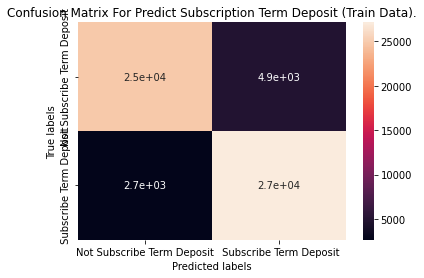

In [ ]:
# Get the confusion matrix for both train Dataset

labels = ['Not Subscribe Term Deposit', ' Subscribe Term Deposit']
cm = confusion_matrix(y_train,y_pred_train)

ax= plt.subplot()
sns.heatmap(cm, annot=True,ax=ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Predict Subscription Term Deposit (Train Data).')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[Text(0, 0.5, 'Not Subscribe Term Deposit'),
 Text(0, 1.5, ' Subscribe Term Deposit')]

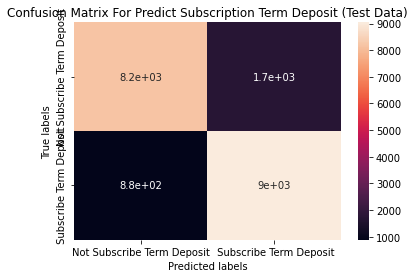

In [ ]:
# Get the confusion matrix for both Test Dataset

labels = ['Not Subscribe Term Deposit', ' Subscribe Term Deposit']
cm = confusion_matrix(y_test, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True,ax=ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Predict Subscription Term Deposit (Test Data)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Print the classification report for train and test
print(classification_report(y_train,y_pred_train))
print("\n")
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.83      0.87     29783
         1.0       0.85      0.91      0.88     29783

    accuracy                           0.87     59566
   macro avg       0.88      0.87      0.87     59566
weighted avg       0.88      0.87      0.87     59566



              precision    recall  f1-score   support

         0.0       0.90      0.83      0.86      9928
         1.0       0.84      0.91      0.87      9928

    accuracy                           0.87     19856
   macro avg       0.87      0.87      0.87     19856
weighted avg       0.87      0.87      0.87     19856



##**Classification report shows the precision, recall, F1 and support scores for the Sequential Neural Network model.**

**1. Precision of 0 (the client said no) represents that for all instances predicted as no subscription, the percentage of clients that actually said no is 90% & the percentage of clients that actually said Yes is 84%.**

**2. Recall is the ability of a classifier to find all positive instances. Recall of 0 indicates that for all clients that actually said no, the model predicts 83% correctly that they would decline the offer & 91% correctly that they would accept the offer.**

**3. In general, the report shows that Sequential Neural Networks model is also showing Very good predictive power to identify the customers who would subscribe to the term deposit.**

### **Visualizing the model performance**

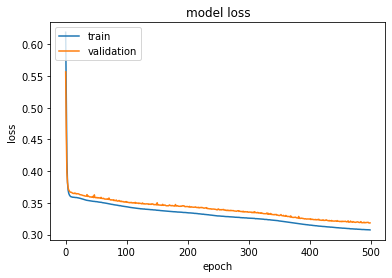

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

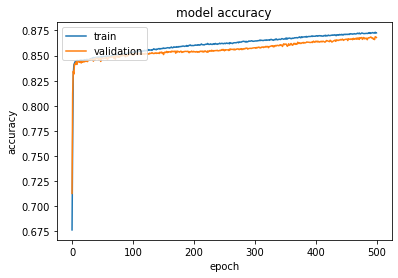

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# **6.XGB Classifier**

In [ ]:
# XGB Classifier
model = XGBClassifier(n_estimators=140,learning_rate=0.1 , max_depth=5,min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
param_test= {'max_depth':[3,5,7],'min_child_weight':[1,3,5]}
gsearch = GridSearchCV(estimator = model, param_grid = param_test, scoring='roc_auc',n_jobs=4,cv=5, verbose=2)
gsearch.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(colsample_bytree=0.8, max_depth=5,
                                     n_estimators=140, nthread=4, seed=27,
                                     subsample=0.8),
             n_jobs=4,
             param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
             scoring='roc_auc', verbose=2)

In [ ]:
gsearch.best_params_, gsearch.best_score_

({'max_depth': 7, 'min_child_weight': 1}, 0.9902319922399215)

In [ ]:
y_pred_train=gsearch.predict(X_train) 
y_pred=gsearch.predict(X_test) 

In [ ]:
print(f'Accuracy Score for Test Data is {accuracy_score(y_test,y_pred)}')
print(f'Accuracy Score for Train Data is {accuracy_score(y_train,y_pred_train)}')

Accuracy Score for Test Data is 0.9399677679290894
Accuracy Score for Train Data is 0.9605815398045865


In [ ]:
#roc_auc_score
print(f'roc_auc_score Score for Test Data is {roc_auc_score(y_test,y_pred)}')
print(f'roc_auc_score Score for Train Data is {roc_auc_score(y_train,y_pred_train)}')

roc_auc_score Score for Test Data is 0.9399677679290894
roc_auc_score Score for Train Data is 0.9605815398045865


In [ ]:
confusion_matrix(y_test, y_pred)
print('confusion_matrix  for Test Data is')
print(confusion_matrix(y_test, y_pred))
print('confusion_matrix  for Train Data is')
print(confusion_matrix(y_train,y_pred_train))

confusion_matrix  for Test Data is
[[9300  628]
 [ 564 9364]]
confusion_matrix  for Train Data is
[[28668  1115]
 [ 1233 28550]]


In [ ]:
# Print the classification report for train and test
print(classification_report(y_train,y_pred_train))
print("\n")
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96     29783
         1.0       0.96      0.96      0.96     29783

    accuracy                           0.96     59566
   macro avg       0.96      0.96      0.96     59566
weighted avg       0.96      0.96      0.96     59566



              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      9928
         1.0       0.94      0.94      0.94      9928

    accuracy                           0.94     19856
   macro avg       0.94      0.94      0.94     19856
weighted avg       0.94      0.94      0.94     19856



##**Classification report shows the precision, recall, F1 and support scores for the XGB Classifier model.**

**1. Precision of 0 (the client said no) represents that for all instances predicted as no subscription, the percentage of clients that actually said no is 94% & the percentage of clients that actually said Yes is 94%.**

**2. Recall is the ability of a classifier to find all positive instances. Recall of 0 indicates that for all clients that actually said no, the model predicts 94% correctly that they would decline the offer & 94% correctly that they would accept the offer.**

**3. In general, the report shows that XGB Classifier model is  showing Best predictive power to identify the customers who would subscribe to the term deposit among all claassification Models**

# **CASE II. Without Considering Duration Variable**

# **Important note: Duration attribute highly affects the output target (e.g., if duration=0 then y='no'). Also , the duration is not known before a call is performed. Also, after the end of the call y is obviously known so that why inorder to have Realistic Model Lets drop the duration Feature**. 

# **Thus, The Drop Duration feature inorder to have a realistic predictive Machine Learing Model**

In [833]:
x_smote.head()

age  default   balance  housing  loan       day  duration  campaign  \
0  0.519481      0.0  0.077803      1.0   0.0  0.133333  0.067251       0.0   
1  0.337662      0.0  0.025456      1.0   0.0  0.133333  0.038907       0.0   
2  0.194805      0.0  0.024787      1.0   1.0  0.133333  0.019583       0.0   
3  0.376623      0.0  0.062030      1.0   0.0  0.133333  0.023705       0.0   
4  0.194805      0.0  0.024762      0.0   0.0  0.133333  0.051018       0.0   

   pdays  previous  ...  education_tertiary  education_unknown  \
0    0.0       0.0  ...                 1.0                0.0   
1    0.0       0.0  ...                 0.0                0.0   
2    0.0       0.0  ...                 0.0                0.0   
3    0.0       0.0  ...                 0.0                1.0   
4    0.0       0.0  ...                 0.0                1.0   

   contact_cellular  contact_telephone  contact_unknown  poutcome_failure  \
0               0.0                0.0              1.0               0.0   
1               0.0                0.0              1.0               0.0   
2               0.0                0.0              1.0               0.0   
3               0.0                0.0              1.0               0.0   
4               0.0                0.0              1.0               0.0   

   poutcome_other  poutcome_success  poutcome_unknown  Month  
0             0.0               0.0               1.0    1.0  
1             0.0               0.0               1.0    1.0  
2             0.0               0.0               1.0    1.0  
3             0.0               0.0               1.0    1.0  
4             0.0               0.0               1.0    1.0  

[5 rows x 37 columns]

In [834]:
x_smote.drop('duration', axis = 1, inplace = True)

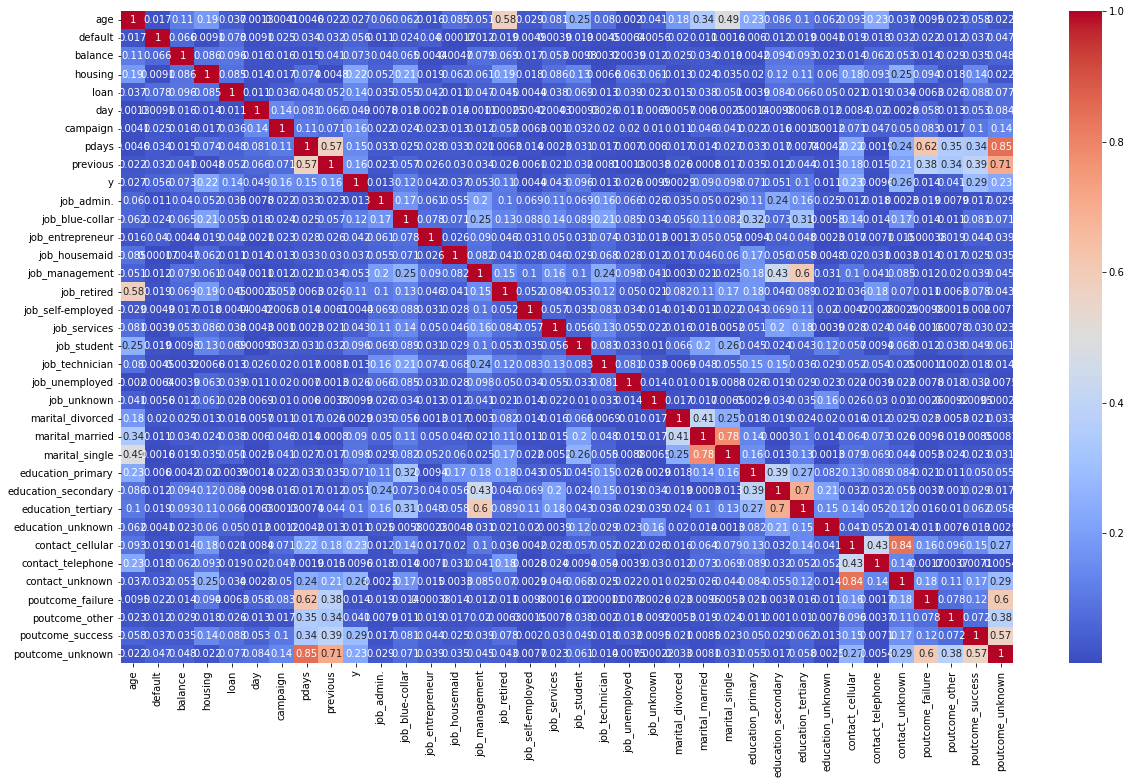

In [257]:
#Lets find Corelatrion ship between independent features
plt.figure(figsize=(20,12))
correlation = x_smote.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

### **So from above Corelarion Matrix we can get that some of the features are highely corelated with each other, So we have to reduce multicolinearity between independent features, So just before that lets find out Feature Importance of independent features then we can select independent features for model based on corelation matrix and feature importance.**

# **2. Feature importance**

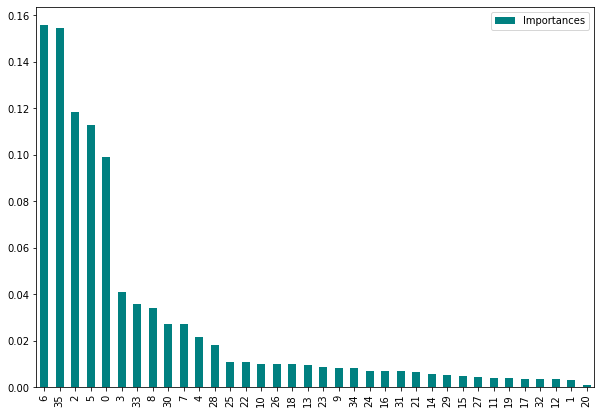

In [835]:

from sklearn.ensemble import RandomForestClassifier
  # Create the random forest eith hyperparameters
model= RandomForestClassifier(n_estimators=340)
  # Fit the mmodel
model.fit(x_smote, y_smote)
  # get the importance of thr resulting features
importances= model.feature_importances_
  # Create a data frame for visualization
final_df= pd.DataFrame({"Features": pd.DataFrame(x_smote).columns, "Importances": importances})
final_df.set_index('Importances')
  # Sort in ascending order to better visualization
final_df= final_df.sort_values('Importances',ascending= False)
  # Plot the feature importances in bars
final_df.plot.bar(color='teal',figsize=(10,7))

In [836]:
# Feature Importance of the Independent Features
final_df

Features  Importances
6              campaign     0.155917
35                Month     0.154486
2               balance     0.118359
5                   day     0.112903
0                   age     0.098846
3               housing     0.040771
33     poutcome_success     0.035773
8              previous     0.034218
30      contact_unknown     0.027210
7                 pdays     0.027161
4                  loan     0.021616
28     contact_cellular     0.018279
25  education_secondary     0.010685
22      marital_married     0.010572
10      job_blue-collar     0.010079
26   education_tertiary     0.009982
18       job_technician     0.009977
13       job_management     0.009361
23       marital_single     0.008681
9            job_admin.     0.008330
34     poutcome_unknown     0.008054
24    education_primary     0.007103
16         job_services     0.006836
31     poutcome_failure     0.006727
21     marital_divorced     0.006341
14          job_retired     0.005412
29    contact_telephone     0.005026
15    job_self-employed     0.004651
27    education_unknown     0.004355
11     job_entrepreneur     0.003954
19       job_unemployed     0.003909
17          job_student     0.003594
32       poutcome_other     0.003330
12        job_housemaid     0.003273
1               default     0.003168
20          job_unknown     0.001062

In [837]:
final_df[final_df.Importances>0.01].Features.to_list()

['campaign',
 'Month',
 'balance',
 'day',
 'age',
 'housing',
 'poutcome_success',
 'previous',
 'contact_unknown',
 'pdays',
 'loan',
 'contact_cellular',
 'education_secondary',
 'marital_married',
 'job_blue-collar']

In [838]:
new_df =x_smote[final_df[final_df.Importances>0.01].Features.to_list()]

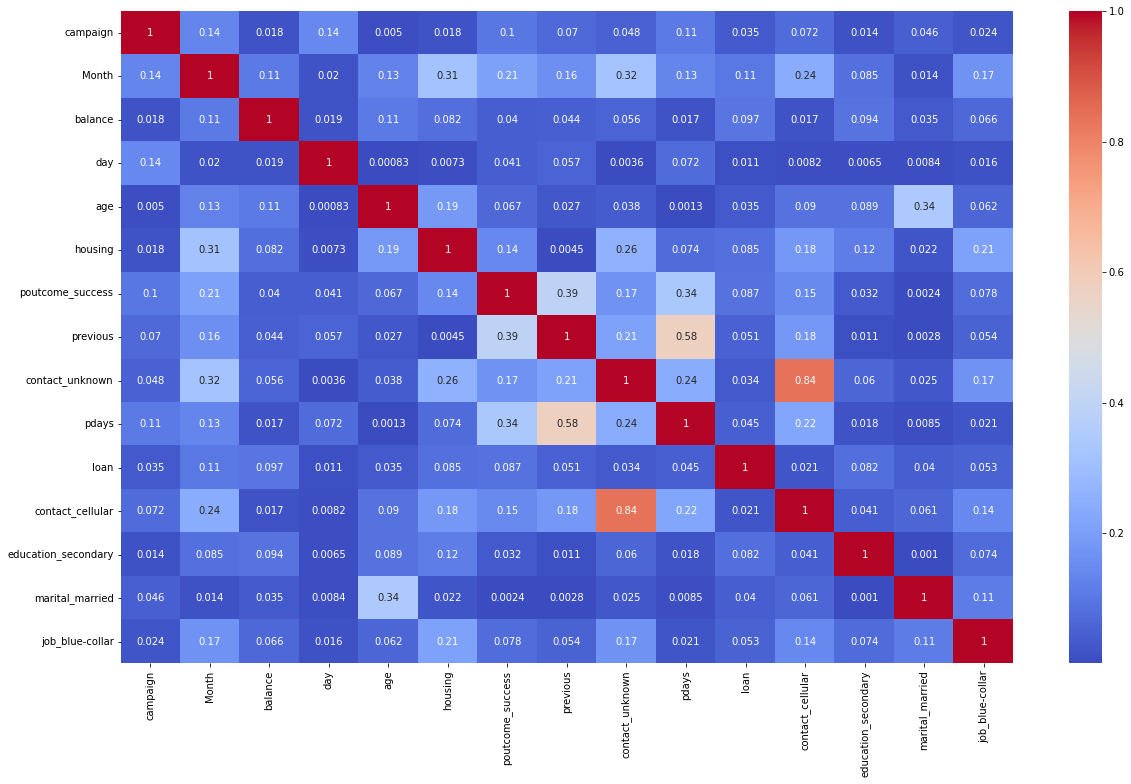

In [ ]:
#Lets find Corelatrion ship between independent features
plt.figure(figsize=(20,12))
correlation = new_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

### **So now lets drop highely corelated feature which are having corelation more than 0.4 in order to avoid Multicolinearity between the features by considering the Feature Importance of the respective features.**

In [839]:
new_df.drop (['contact_cellular','pdays'],axis =1 , inplace = True)

### **Now Lets Select The Features which are having Feature Importance with respective Dependent Feature greter than 0.01 for implementing Machine Learning Model**

In [840]:
independent_variables= new_df.columns.to_list()
print(f'independent_variables are {independent_variables}')

dependent_variables = 'y'
print(f'independent_variables are {dependent_variables}')

independent_variables are ['campaign', 'Month', 'balance', 'day', 'age', 'housing', 'poutcome_success', 'previous', 'contact_unknown', 'loan', 'education_secondary', 'marital_married', 'job_blue-collar']
independent_variables are y


In [841]:
# Creating the dataset with all independent variables
X = x_smote[independent_variables]

# Creating the dataset with the dependent variable
Y = y_smote

In [842]:
print(X.shape,Y.shape)

(79422, 13) (79422,)


In [843]:
#Lets Split The dataset Into Test & Train dataset
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0,stratify= Y)

In [844]:

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

# **1. RandomForestClassifier**

In [ ]:
# Hyperparameter tuning for Random Forest Classifier
classifier = RandomForestClassifier() 
grid_values = {'n_estimators':[100, 300,500], 'max_depth':[5, 7,10]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)
classifier.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 7, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='roc_auc')

In [ ]:
classifier.best_score_

0.9242875668656747

In [ ]:
classifier.best_params_

{'max_depth': 10, 'n_estimators': 500}

In [ ]:
y_pred  =  classifier.predict(X_test)
y_pred_train  =  classifier.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

print(f'Accuracy Score for Test Data is {accuracy_score(y_test,y_pred)}')
print(f'Accuracy Score for Train Data is {accuracy_score(y_train,y_pred_train)}')


Accuracy Score for Test Data is 0.8506748589846898
Accuracy Score for Train Data is 0.863395225464191


In [ ]:

print(f'roc_auc_score Score for Test Data is {roc_auc_score(y_test,y_pred)}')
print(f'roc_auc_score Score for Train Data is {roc_auc_score(y_train,y_pred_train)}')

roc_auc_score Score for Test Data is 0.8506748589846898
roc_auc_score Score for Train Data is 0.8633952254641911


In [ ]:
confusion_matrix(y_test, y_pred)
print('confusion_matrix  for Test Data is')
print(confusion_matrix(y_test, y_pred))
print('confusion_matrix  for Train Data is')
print(confusion_matrix(y_train,y_pred_train))

confusion_matrix  for Test Data is
[[8917 1011]
 [1954 7974]]
confusion_matrix  for Train Data is
[[27100  2683]
 [ 5454 24329]]


In [858]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_recall_curve

In [ ]:
# Print the classification report for train and test
print(classification_report(y_train,y_pred_train))
print("\n")
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87     29783
         1.0       0.90      0.82      0.86     29783

    accuracy                           0.86     59566
   macro avg       0.87      0.86      0.86     59566
weighted avg       0.87      0.86      0.86     59566



              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      9928
         1.0       0.89      0.80      0.84      9928

    accuracy                           0.85     19856
   macro avg       0.85      0.85      0.85     19856
weighted avg       0.85      0.85      0.85     19856



##**Classification report shows the precision, recall, F1 and support scores for the Random forest Classifier model.**

**1. Precision of 0 (the client said no) represents that for all instances predicted as no subscription, the percentage of clients that actually said no is 82% & the percentage of clients that actually said Yes is 89%.**

**2. Recall is the ability of a classifier to find all positive instances. Recall of 0 indicates that for all clients that actually said no, the model predicts 90% correctly that they would decline the offer & 80% correctly that they would accept the offer.**

**3. In general, the report shows that  Random forest Classifier model is  showing good predictive power to identify the customers who would subscribe to the term deposit.**

# **2.Naive Bayes Algorithm**

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)


GaussianNB()

In [ ]:
y_pred  =  classifier_nb.predict(X_test)
y_pred_train  =  classifier_nb.predict(X_train)

In [ ]:
print(f'Accuracy Score for Test Data is {accuracy_score(y_test,y_pred)}')
print(f'Accuracy Score for Train Data is {accuracy_score(y_train,y_pred_train)}')

Accuracy Score for Test Data is 0.690068493150685
Accuracy Score for Train Data is 0.6899741463250848


In [ ]:
#roc_auc_score
print(f'roc_auc_score Score for Test Data is {roc_auc_score(y_test,y_pred)}')
print(f'roc_auc_score Score for Train Data is {roc_auc_score(y_train,y_pred_train)}')

roc_auc_score Score for Test Data is 0.690068493150685
roc_auc_score Score for Train Data is 0.6899741463250848


In [ ]:
confusion_matrix(y_test, y_pred)
print('confusion_matrix  for Test Data is')
print(confusion_matrix(y_test, y_pred))
print('confusion_matrix  for Train Data is')
print(confusion_matrix(y_train,y_pred_train))

confusion_matrix  for Test Data is
[[7419 2509]
 [3645 6283]]
confusion_matrix  for Train Data is
[[22333  7450]
 [11017 18766]]


In [ ]:
# Print the classification report for train and test
print(classification_report(y_train,y_pred_train))
print("\n")
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.75      0.71     29783
         1.0       0.72      0.63      0.67     29783

    accuracy                           0.69     59566
   macro avg       0.69      0.69      0.69     59566
weighted avg       0.69      0.69      0.69     59566



              precision    recall  f1-score   support

         0.0       0.67      0.75      0.71      9928
         1.0       0.71      0.63      0.67      9928

    accuracy                           0.69     19856
   macro avg       0.69      0.69      0.69     19856
weighted avg       0.69      0.69      0.69     19856



##**Classification report shows the precision, recall, F1 and support scores for the Naive Bayes Algorithm.**

**1. Precision of 0 (the client said no) represents that for all instances predicted as no subscription, the percentage of clients that actually said no is 67% & the percentage of clients that actually said Yes is 71%.**

**2. Recall is the ability of a classifier to find all positive instances. Recall of 0 indicates that for all clients that actually said no, the model predicts 75% correctly that they would decline the offer & 63% correctly that they would accept the offer.**

**3. In general, the report shows that Naive Bayes Algorithm is  showing not a very good predictive power to identify the customers who would subscribe to the term deposit among all claassification Models**

# **3.Support vector classifier**

In [ ]:
from sklearn.svm import SVC #Support vector classifier
from sklearn import datasets, metrics, model_selection, svm

In [ ]:
# Lets Apply Support vector classifier along GridSearchCV for hyperparameter tuning
model = SVC( gamma ='scale')
params={'C':[ 5,10],
        'kernel' : ['rbf', 'sigmoid']}
gs=GridSearchCV(estimator=model, param_grid=params, cv=5,verbose= 2)
# now fit the dataset to the GridSearchCV object. 
gs = gs.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ....................................C=5, kernel=rbf; total time= 2.5min
[CV] END ....................................C=5, kernel=rbf; total time= 2.4min
[CV] END ....................................C=5, kernel=rbf; total time= 2.5min
[CV] END ....................................C=5, kernel=rbf; total time= 2.4min
[CV] END ....................................C=5, kernel=rbf; total time= 2.4min
[CV] END ................................C=5, kernel=sigmoid; total time= 2.8min
[CV] END ................................C=5, kernel=sigmoid; total time= 2.7min
[CV] END ................................C=5, kernel=sigmoid; total time= 2.8min
[CV] END ................................C=5, kernel=sigmoid; total time= 2.7min
[CV] END ................................C=5, kernel=sigmoid; total time= 2.8min
[CV] END ...................................C=10, kernel=rbf; total time= 2.5min
[CV] END ...................................C=10,

In [ ]:
gs.best_params_

{'C': 10, 'kernel': 'rbf'}

In [ ]:
gs.best_score_

0.7326829941788391

In [ ]:
y_pred  =  gs.predict(X_test)
y_pred_train  =  gs.predict(X_train)

In [ ]:
print(f'Accuracy Score for Test Data is {accuracy_score(y_test,y_pred)}')
print(f'Accuracy Score for Train Data is {accuracy_score(y_train,y_pred_train)}')

Accuracy Score for Test Data is 0.7333803384367445
Accuracy Score for Train Data is 0.7366786421784239


In [ ]:
#roc_auc_score
print(f'roc_auc_score Score for Test Data is {roc_auc_score(y_test,y_pred)}')
print(f'roc_auc_score Score for Train Data is {roc_auc_score(y_train,y_pred_train)}')

roc_auc_score Score for Test Data is 0.7333803384367445
roc_auc_score Score for Train Data is 0.7366786421784239


In [ ]:
confusion_matrix(y_test, y_pred)
print('confusion_matrix  for Test Data is')
print(confusion_matrix(y_test, y_pred))
print('confusion_matrix  for Train Data is')
print(confusion_matrix(y_train,y_pred_train))

confusion_matrix  for Test Data is
[[7772 2156]
 [3138 6790]]
confusion_matrix  for Train Data is
[[23596  6187]
 [ 9498 20285]]


In [ ]:
# Print the classification report for train and test
print(classification_report(y_train,y_pred_train))
print("\n")
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.79      0.75     29783
         1.0       0.77      0.68      0.72     29783

    accuracy                           0.74     59566
   macro avg       0.74      0.74      0.74     59566
weighted avg       0.74      0.74      0.74     59566



              precision    recall  f1-score   support

         0.0       0.71      0.78      0.75      9928
         1.0       0.76      0.68      0.72      9928

    accuracy                           0.73     19856
   macro avg       0.74      0.73      0.73     19856
weighted avg       0.74      0.73      0.73     19856



##**Classification report shows the precision, recall, F1 and support scores for the Support vector classifier model.**

**1. Precision of 0 (the client said no) represents that for all instances predicted as no subscription, the percentage of clients that actually said no is 71% & the percentage of clients that actually said Yes is 76%.**

**2. Recall is the ability of a classifier to find all positive instances. Recall of 0 indicates that for all clients that actually said no, the model predicts 78% correctly that they would decline the offer & 68% correctly that they would accept the offer.**

**3. In general, the report shows that Support vector classifier is  showing average predictive power to identify the customers who would subscribe to the term deposit**

# **4.KNeighborsClassifier**

In [ ]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
model= KNeighborsClassifier(metric = 'minkowski') 
params={'n_neighbors':[5,7,10],
        'weights':['uniform','distance'],
        'p': [1,2]}
classifier_knn=GridSearchCV(estimator=model, param_grid=params, cv=5,verbose= 2,n_jobs =-1) 


In [ ]:
classifier_knn.fit(X_train, y_train)  

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 7, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [ ]:
classifier_knn.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [ ]:
classifier_knn.best_score_

0.8568646891180915

In [ ]:
y_pred  =  classifier_knn.predict(X_test)
y_pred_train  =  classifier_knn.predict(X_train)

In [ ]:
print(f'Accuracy Score for Test Data is {accuracy_score(y_test,y_pred)}')
print(f'Accuracy Score for Train Data is {accuracy_score(y_train,y_pred_train)}')

Accuracy Score for Test Data is 0.8669923448831588
Accuracy Score for Train Data is 0.9999832118994058


In [ ]:
#roc_auc_score
print(f'roc_auc_score Score for Test Data is {roc_auc_score(y_test,y_pred)}')
print(f'roc_auc_score Score for Train Data is {roc_auc_score(y_train,y_pred_train)}')

roc_auc_score Score for Test Data is 0.8669923448831587
roc_auc_score Score for Train Data is 0.9999832118994056


In [ ]:
confusion_matrix(y_test, y_pred)
print('confusion_matrix  for Test Data is')
print(confusion_matrix(y_test, y_pred))
print('confusion_matrix  for Train Data is')
print(confusion_matrix(y_train,y_pred_train))

confusion_matrix  for Test Data is
[[8373 1555]
 [1086 8842]]
confusion_matrix  for Train Data is
[[29783     0]
 [    1 29782]]


In [ ]:
# Print the classification report for train and test
print(classification_report(y_train,y_pred_train))
print("\n")
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29783
         1.0       1.00      1.00      1.00     29783

    accuracy                           1.00     59566
   macro avg       1.00      1.00      1.00     59566
weighted avg       1.00      1.00      1.00     59566



              precision    recall  f1-score   support

         0.0       0.89      0.84      0.86      9928
         1.0       0.85      0.89      0.87      9928

    accuracy                           0.87     19856
   macro avg       0.87      0.87      0.87     19856
weighted avg       0.87      0.87      0.87     19856



##**Classification report shows the precision, recall, F1 and support scores for the KNeighborsClassifier Model.**

**1. Precision of 0 (the client said no) represents that for all instances predicted as no subscription, the percentage of clients that actually said no is 89% & the percentage of clients that actually said Yes is 85%.**

**2. Recall is the ability of a classifier to find all positive instances. Recall of 0 indicates that for all clients that actually said no, the model predicts 84% correctly that they would decline the offer & 89% correctly that they would accept the offer.**

**3. In general, the report shows that KNeighborsClassifier model is  showing Very Good predictive power to identify the customers who would subscribe to the term deposit.**

# **5.Sequential Neural Networks.**

In [845]:
!pip install keras

In [846]:
from keras.models import Sequential
from keras.layers import Dense
# from keras.optimizers import adam
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
model = Sequential()
model.add(Dense(13, input_dim=13, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
    
    # compile model
# adam = adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [847]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 10)                140       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 333
Trainable params: 333
Non-trainable params: 0
_________________________________________________________________


In [848]:
model_history = model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=500, verbose=2)

Epoch 1/500
1862/1862 - 11s - loss: 0.6270 - accuracy: 0.6604 - val_loss: 0.5839 - val_accuracy: 0.6867 - 11s/epoch - 6ms/step
Epoch 2/500
1862/1862 - 8s - loss: 0.5843 - accuracy: 0.6875 - val_loss: 0.5800 - val_accuracy: 0.6914 - 8s/epoch - 4ms/step
Epoch 3/500
1862/1862 - 5s - loss: 0.5825 - accuracy: 0.6903 - val_loss: 0.5790 - val_accuracy: 0.6945 - 5s/epoch - 3ms/step
Epoch 4/500
1862/1862 - 7s - loss: 0.5820 - accuracy: 0.6911 - val_loss: 0.5785 - val_accuracy: 0.6952 - 7s/epoch - 4ms/step
Epoch 5/500
1862/1862 - 6s - loss: 0.5814 - accuracy: 0.6905 - val_loss: 0.5780 - val_accuracy: 0.6948 - 6s/epoch - 3ms/step
Epoch 6/500
1862/1862 - 5s - loss: 0.5810 - accuracy: 0.6902 - val_loss: 0.5776 - val_accuracy: 0.6954 - 5s/epoch - 3ms/step
Epoch 7/500
1862/1862 - 4s - loss: 0.5808 - accuracy: 0.6894 - val_loss: 0.5782 - val_accuracy: 0.6913 - 4s/epoch - 2ms/step
Epoch 8/500
1862/1862 - 6s - loss: 0.5805 - accuracy: 0.6907 - val_loss: 0.5772 - val_accuracy: 0.6937 - 6s/epoch - 3ms/ste

In [849]:
y_pred_train=model.predict(X_train)>0.5
y_pred=model.predict(X_test)>0.5

In [850]:
print(f'Accuracy Score for Test Data is {accuracy_score(y_test,y_pred)}')
print(f'Accuracy Score for Train Data is {accuracy_score(y_train,y_pred_train)}')

Accuracy Score for Test Data is 0.7297038678485093
Accuracy Score for Train Data is 0.7281670751771144


In [851]:
#roc_auc_score
print(f'roc_auc_score Score for Test Data is {roc_auc_score(y_test,y_pred)}')
print(f'roc_auc_score Score for Train Data is {roc_auc_score(y_train,y_pred_train)}')

roc_auc_score Score for Test Data is 0.7297038678485093
roc_auc_score Score for Train Data is 0.7281670751771145


In [852]:
confusion_matrix(y_test, y_pred)
print('confusion_matrix  for Test Data is')
print(confusion_matrix(y_test, y_pred))
print('confusion_matrix  for Train Data is')
print(confusion_matrix(y_train,y_pred_train))

confusion_matrix  for Test Data is
[[7675 2253]
 [3114 6814]]
confusion_matrix  for Train Data is
[[23230  6553]
 [ 9639 20144]]


[Text(0, 0.5, 'Not Subscribe Term Deposit'),
 Text(0, 1.5, ' Subscribe Term Deposit')]

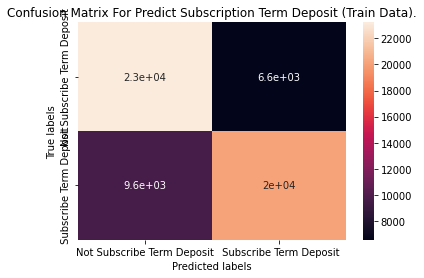

In [853]:
# Get the confusion matrix for both train Dataset

labels = ['Not Subscribe Term Deposit', ' Subscribe Term Deposit']
cm = confusion_matrix(y_train,y_pred_train)

ax= plt.subplot()
sns.heatmap(cm, annot=True,ax=ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Predict Subscription Term Deposit (Train Data).')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[Text(0, 0.5, 'Not Subscribe Term Deposit'),
 Text(0, 1.5, ' Subscribe Term Deposit')]

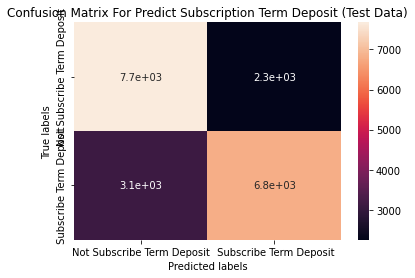

In [854]:
# Get the confusion matrix for both Test Dataset

labels = ['Not Subscribe Term Deposit', ' Subscribe Term Deposit']
cm = confusion_matrix(y_test, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True,ax=ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Predict Subscription Term Deposit (Test Data)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### **Visualizing the model performance**

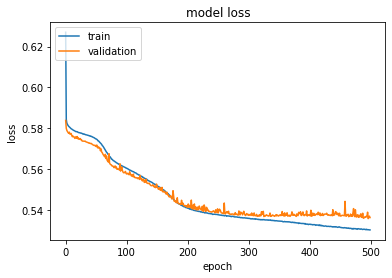

In [856]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

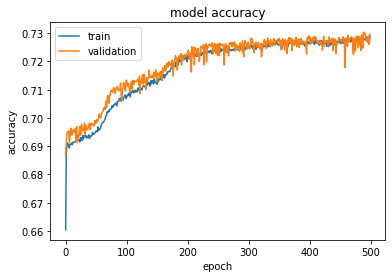

In [857]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [859]:
# Print the classification report for train and test
print(classification_report(y_train,y_pred_train))
print("\n")
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.78      0.74     29783
         1.0       0.75      0.68      0.71     29783

    accuracy                           0.73     59566
   macro avg       0.73      0.73      0.73     59566
weighted avg       0.73      0.73      0.73     59566



              precision    recall  f1-score   support

         0.0       0.71      0.77      0.74      9928
         1.0       0.75      0.69      0.72      9928

    accuracy                           0.73     19856
   macro avg       0.73      0.73      0.73     19856
weighted avg       0.73      0.73      0.73     19856



##**Classification report shows the precision, recall, F1 and support scores for the Sequential Neural Network model.**

**1. Precision of 0 (the client said no) represents that for all instances predicted as no subscription, the percentage of clients that actually said no is 71% & the percentage of clients that actually said Yes is 75%.**

**2. Recall is the ability of a classifier to find all positive instances. Recall of 0 indicates that for all clients that actually said no, the model predicts 77% correctly that they would decline the offer & 69% correctly that they would accept the offer.**

**3. In general, the report shows that Sequential Neural Network model is  showing average predictive power to identify the customers who would subscribe to the term deposit.**

# **6.XGBClassifier.**

In [ ]:
# XGB Classifier
model = XGBClassifier(n_estimators=140,learning_rate=0.1 , max_depth=5,min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
param_test= {'max_depth':[3,5,7],'min_child_weight':[1,3,5]}
gsearch = GridSearchCV(estimator = model, param_grid = param_test, scoring='roc_auc',n_jobs=4,cv=5, verbose=2)
gsearch.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(colsample_bytree=0.8, max_depth=5,
                                     n_estimators=140, nthread=4, seed=27,
                                     subsample=0.8),
             n_jobs=4,
             param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
             scoring='roc_auc', verbose=2)

In [ ]:
gsearch.best_params_, gsearch.best_score_

({'max_depth': 7, 'min_child_weight': 3}, 0.9718773405210014)

In [ ]:
y_pred = gsearch.predict(X_test)
y_pred_train=gsearch.predict(X_train)

In [ ]:
print(f'Accuracy Score for Test Data is {accuracy_score(y_test,y_pred)}')
print(f'Accuracy Score for Train Data is {accuracy_score(y_train,y_pred_train)}')

Accuracy Score for Test Data is 0.9281325543916197
Accuracy Score for Train Data is 0.9390759829432898


In [ ]:
#roc_auc_score
print(f'roc_auc_score Score for Test Data is {roc_auc_score(y_test,y_pred)}')
print(f'roc_auc_score Score for Train Data is {roc_auc_score(y_train,y_pred_train)}')

roc_auc_score Score for Test Data is 0.9281325543916197
roc_auc_score Score for Train Data is 0.9390759829432898


In [ ]:
confusion_matrix(y_test, y_pred)
print('confusion_matrix  for Test Data is')
print(confusion_matrix(y_test, y_pred))
print('confusion_matrix  for Train Data is')
print(confusion_matrix(y_train,y_pred_train))

confusion_matrix  for Test Data is
[[9618  310]
 [1117 8811]]
confusion_matrix  for Train Data is
[[29151   632]
 [ 2997 26786]]


In [ ]:
# Print the classification report for train and test
print(classification_report(y_train,y_pred_train))
print("\n")
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     29783
         1.0       0.98      0.90      0.94     29783

    accuracy                           0.94     59566
   macro avg       0.94      0.94      0.94     59566
weighted avg       0.94      0.94      0.94     59566



              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      9928
         1.0       0.97      0.89      0.93      9928

    accuracy                           0.93     19856
   macro avg       0.93      0.93      0.93     19856
weighted avg       0.93      0.93      0.93     19856



##**Classification report shows the precision, recall, F1 and support scores for the XGB Classifier model.**

**1. Precision of 0 (the client said no) represents that for all instances predicted as no subscription, the percentage of clients that actually said no is 90% & the percentage of clients that actually said Yes is 97%.**

**2. Recall is the ability of a classifier to find all positive instances. Recall of 0 indicates that for all clients that actually said no, the model predicts 97% correctly that they would decline the offer & 89% correctly that they would accept the offer.**

**3. In general, the report shows that XGB Classifier model is  showing Best predictive power to identify the customers who would subscribe to the term deposit among all claassification Models**

# **Selection of Best Model**

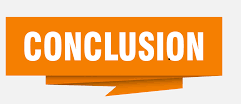

# **Conclusion**
### **1.The EDA of the dataset shows that clients of ages above 60 years and under 30 years have a higher probability of subscribed yes. The housing/loan subscribed rate shows a higher probability when loan is no. The subscribed clients also have higher probability of having the duration over 300.**

###**2. Elderly age group have the highest subscription rate. About 17% of the subscriptions came from the clients aged between 18 to 29.**

###**3. Avegrage More than 60 % of the subscriptions are contributed by the youngest and the eldest clients.**

### **4.In summary, the bank should prioritize its telemarketing to clients who are above 60 years old and have positive balances, because they have the highest acceptance rate of about 35%. The next group the bank should focus on is young clients with positive balances, who showed high subscription rates between 15% and 20%.**

### **5.We see that the feature ‘duration’, which tells us about the duration of the last call in seconds, is more than twice for the customers who bought the products than for customers who didn’t..**

### **6. Unsurprisingly, this bar chart indicates a positive correlation between clients’ balance levels and subscription rate. Clients with negative balances only returned a subscription rate of 6.9% while clients with average or high balances had significantly higher subscription rates, average 15%. However, in this campaign, more than 50% of clients contacted only have a low balance level. In the future, the bank should shift its marketing focus to high-balance customers to secure more term deposits.**

###**7. The bank contacted most clients between May and August. The highest contact rate is around 30%, which happened in May, while the contact rate is closer to 0 in March, September, October, and December.However,the subscription rate showed a different trend. The highest subscription rate occurred in March, which is over 50%, and all subscription rates in September, October, and December are over 40%.Clearly, these two lines move in different directions which strongly indicates the inappropriate timing of the bank’s marketing campaign. To improve the marketing campaign, the bank should consider initiating the telemarketing campaign in fall and spring when the subscription rate tends to be higher.**

###**8.By applying Random Forest Classifier and KNN Neighbours classifiers & XGB Classifier classification and estimation model were successfully built with descent results. With help of these three models, the bank will be able to predict a customer's response to its telemarketing campaign before calling this customer. In this way, the bank can allocate more marketing efforts to the clients who are classified as highly likely to accept term deposits, and call less to those who are unlikely to make term deposits.**

###**9. In addition, predicting duration before calling and adjusting marketing plan benefit both the bank and its clients. On the one hand, it will increase the efficiency of the bank’s telemarketing campaign, saving time and efforts. On the other hand, it prevents some clients from receiving undesirable advertisements, raising customer satisfaction. With the aid of logistic and ridge regression models, the bank can enter a virtuous cycle of effective marketing, more investments and happier customers.**

### **10.The best machine learning model was XGBoost CLassifier, which resulted in best AUC score &  one of the best Precision & Recall Value among the all classification model.**

# **Recommendations**
## **1. More appropriate timing**

###**When implementing a marketing strategy, external factors, such as the time of calling, should also be carefully considered. The previous analysis points out that March, September, October and December had the highest success rates. Nevertheless, more data should be collected and analyzed to make sure that this seasonal effect is constant over time. If the trend has the potential to continue in the future, the bank should consider initiating its telemarketing campaign in fall and spring.**

## **2. Smarter marketing design**

###**By targeting the right customers, the bank will have more and more positive responses, and the classification algorithms would ultimately eliminate the imbalance in the original dataset. Hence, more accurate information will be presented to the bank for improving the subscriptions. Meanwhile, to increase the likelihood of subscription, the bank should re-evaluate the content and design of its current campaign, making it more appealing to its target customers.**

##**3. Better services provision**

###**With a more granular understanding of its customer base, the bank has the ability to provide better banking services. For example, marital status and occupation reveal a customer's life stage while loan status indicates his/her overall risk profile. With this information, the bank can estimate when a customer might need to make an investment. In this way, the bank can better satisfy its customer demand by providing banking services for the right customer at the right time.**